# Exploratory Data Analysis



#### Import Packages and Setting File Paths

In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from urllib.request import urlretrieve
from scipy.stats import pearsonr

from config.config import DATA_PATH


In [3]:
pd.set_option('display.max_columns', None)

# Flights Data Overview

In [84]:
datetime_cols = ['scheduled_departure_datetime', 'scheduled_arrival_datetime', 'actual_departure_datetime', 'actual_arrival_datetime', 'scheduled_departure_datetime_utc', 'actual_departure_datetime_utc', 'scheduled_arrival_datetime_utc', 'actual_arrival_datetime_utc']

In [85]:
flights = pd.read_csv(DATA_PATH + '/interim/flights_historical_performance.csv', parse_dates=datetime_cols)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [5]:
flights.shape

(7260941, 95)

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260941 entries, 0 to 7260940
Data columns (total 95 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   year                              int64  
 1   quarter                           int64  
 2   month                             int64  
 3   day_of_month                      int64  
 4   day_of_week                       int64  
 5   marketing_airline_id              int64  
 6   flight_number_marketing_airline   int64  
 7   operating_airline_id              int64  
 8   tail_number                       object 
 9   origin_airport_id                 int64  
 10  origin_city_market_id             int64  
 11  origin                            object 
 12  origin_state                      object 
 13  dest_airport_id                   int64  
 14  dest_city_market_id               int64  
 15  dest                              object 
 16  dest_state                        ob

In [7]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaN,NaN,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaN,2023-08-07 11:00:00+00:00,NaN,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,11.666667,4.0,41.0,3.823529,0.0,37.0,3.0,0.0,18.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,12.543860,2.0,154.0,-2.142857,-7.0,124.0,4.0,0.0,57.0
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,13.944444,4.0,76.0,5.705882,0.0,69.0,3.0,0.0,18.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,13.637931,2.5,154.0,-0.894737,-7.0,124.0,4.0,0.0,58.0
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,13.444444,4.0,76.0,5.823529,0.0,69.0,3.0,0.0,18.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,13.220339,2.0,154.0,-1.103448,-7.0,124.0,4.0,0.0,59.0
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+0

In [8]:
missing = flights.isna().sum().reset_index(name='num_missing')
missing[missing['num_missing'] > 0]

,index,num_missing
8,tail_number,19648
17,dep_delay,90160
18,dep_del15,90160
19,departure_delay_groups,90160
20,taxi_out,93119
21,taxi_in,93897
22,arr_delay,93897
23,arr_del15,93897
24,arrival_delay_groups,93897
27,scheduled_elapsed_time,4


In [9]:
dep_missing = flights['actual_departure_datetime'].isnull()
flights[dep_missing].groupby('cancelled')['scheduled_departure_datetime'].size()

cancelled
1    93897
Name: scheduled_departure_datetime, dtype: int64

In [10]:
arr_missing = flights['actual_arrival_datetime'].isna()
flights[arr_missing].groupby('cancelled')['actual_arrival_datetime'].size()

cancelled
1    93897
Name: actual_arrival_datetime, dtype: int64

In [11]:
missing_critical_data = ((flights['actual_arrival_datetime'].isnull()) & (flights['actual_departure_datetime'].isnull()))

flights[missing_critical_data]['cancelled'].value_counts()


cancelled
1    93897
Name: count, dtype: int64

All the rows misisng `DepTime` are cancelled flights. Similarly all the rows missing `ArrTime` are cancelled flights. 

## Overall Data Attributes

**Shape:** The dataset contains information for 7,260,941 completed and cancelled flights in 2023.

**Number of Features:** There are 93 columns currently. 

**dtypes:** Columns have the expected dtypes as some initial cleaning was completed during the data import phase. 

**Missing Values:** 
* Several columns are missing values because these represent the instances of cancelled flights. These columns include information about actual departure times, arrival times, and delay types. 
* Additionally, flights that did not encounter any delays are missing values for the various delay types (Carrier, Weather, NAS (severe weather), Security, Late Aircrafts), as would be expected. 
* Just over 19,000 flights are missing tail number data. These rows will not be able to be joined with the aircraft registration dataframe later on. After gathering usefull information from these flights, I will consider dropping these rows. 
* Between 10,000 to 12,500 flights are missing aggregate performance data. Many of these flights are flights that occurred at the beginning of the calendar year, so there was no data to created aggregations. Others are flights that are on routes and schedules that do not happen frequently.

## Flights Status Overview

I want to look at the number and percentage of flights that were:
1. Completed
2. Cancelled
3. Arrival delays over 15 minutes
4. Departure delays over 15 minutes
5. On Time arrival
6. On Time departure
7. Early arrival
8. Early departure


In [12]:
# calculate number of completed and cancelled flights
cancelled_flights = flights['cancelled'] == 1
completed_flights = flights['cancelled'] == 0

total_cancellations = len(flights.loc[cancelled_flights])
total_completed_flights = len(flights.loc[~cancelled_flights])

print('The total number of completed flights in 2023: ', total_completed_flights)
print('The total number of cancelled flights in 2023: ', total_cancellations)

The total number of completed flights in 2023:  7167044
The total number of cancelled flights in 2023:  93897


In [13]:
# subset flights df into completed and cancelled flights
df_completed = flights.loc[completed_flights]
df_cancelled = flights.loc[cancelled_flights]

To calculate the percentage of canceled flights, use the following formula:

$$
\text{Percentage of Canceled Flights} = \left( \frac{\text{Number of Canceled Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$

To calculate the percentage of completed flights, use the following formula:

$$
\text{Percentage of Completed Flights} = \left( \frac{\text{Number of Completed Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$


In [14]:
flight_cancellation_perc = round(len(df_cancelled) / len(flights) * 100, 2)
flight_completion_perc = round(len(df_completed) / len(flights) * 100, 2)

print(f'The percent of cancelled flights is {flight_cancellation_perc}% and the percent of completed flights is {flight_completion_perc}%')

The percent of cancelled flights is 1.29% and the percent of completed flights is 98.71%


It is great to know that nearly all flights are completed. Although cancelled flights are somewhat of an anomaly, they usually result in high costs for the airline and dissatisfied customers. 

In [15]:
def categorize_flight_status(status):
    """
    Categorize the status of a flight based on its delay time.

    This function classifies the flight status into one of four categories:
    'early', 'on time', 'delayed', or 'unknown'. The classification is based on
    the numerical value provided to the function, which represents the flight's
    delay in minutes.

    Parameters:
    status (float or int): The delay time of the flight. This can be:
        - A negative number indicating the flight arrived or departed early.
        - Zero to <15, indicating the flight was on time.
        - A positive number over 15 indicating the flight was delayed.
        - NaN or any non-numeric value, which will be categorized as 'unknown'.

    Returns:
    str: A string representing the category of the flight's timeliness:
        - 'early' if the status is less than 0.
        - 'on time' if the status is greater than or equal to 0 and less than 15.
        - 'delayed' if the status is greater than 15.
        - 'unknown' if the status is NaN or an unexpected non-numeric value.
    """

    if status < 0:
        return 'early'
    elif 0 <= status < 15 :
        return 'on time'
    elif status >= 15:
        return 'delayed'
    else:
        return 'unknown'


#### ***Are all unknown status flights cancelled flights?***

In [16]:
# categorize flights by status
flights['departure_status'] = flights['dep_delay'].apply(categorize_flight_status)
flights['arrival_status'] = flights['arr_delay'].apply(categorize_flight_status)

In [17]:
unknown_mask = ((flights['arrival_status'] == 'unknown') & (flights['cancelled'] == 1)) | (flights['departure_status'] == 'unknown') & (flights['cancelled'] == 1)
flights[unknown_mask].shape

(93897, 97)

In [18]:
unknown_mask = ((flights['arrival_status'] == 'unknown') & (flights['cancelled'] == 0)) | (flights['departure_status'] == 'unknown') & (flights['cancelled'] == 0)
flights[unknown_mask]

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status


All unknown flights are actually flights that were cancelled. I will change unknown to say 'cancelled' for these flights. 

In [19]:
flights = flights.replace({'arrival_status':'unknown', 'departure_status':'unknown'}, 'cancelled')

### Distribution of flights by flight status for arrivals and depatures

In [20]:
arrival_status_counts = round(flights[['arrival_status']].value_counts(normalize=True) * 100, 1).sort_index()
arrival_status_counts

arrival_status
cancelled          1.3
delayed           20.2
early             60.9
on time           17.6
Name: proportion, dtype: float64

In [21]:
departure_status_counts = round(flights['departure_status'].value_counts(normalize=True) * 100, 1).sort_index()
departure_status_counts

departure_status
cancelled     1.2
delayed      20.0
early        57.3
on time      21.4
Name: proportion, dtype: float64

Cancellations are similar for both groups with approximately 1.3% and 1.2% of flights being cancelled. 

Delays ares similar for both groups with approximately 20.2% of flights experienced arrival delays and 20.0% experienced depature delays.

Slightly more flights arrive early (60.9%) compared to depart early (57.3%).

Slightly less flights arrive on time (17.6%) compared to depart on time (21.4%).



In [22]:
arrivals = flights[['arrival_status']].rename(columns={'arrival_status':'status'})
arrivals['type'] = 'arrival'

departures = flights[['departure_status']].rename(columns={'departure_status':'status'})
departures['type'] = 'departure'

status_df = pd.concat([arrivals, departures])

status_counts = status_df.groupby(['status', 'type']).size().reset_index(name='count')
status_counts

,status,type,count
0,cancelled,arrival,93897
1,cancelled,departure,90160
2,delayed,arrival,1464539
3,delayed,departure,1452880
4,early,arrival,4423925
5,early,departure,4164117
6,on time,arrival,1278580
7,on time,departure,1553784


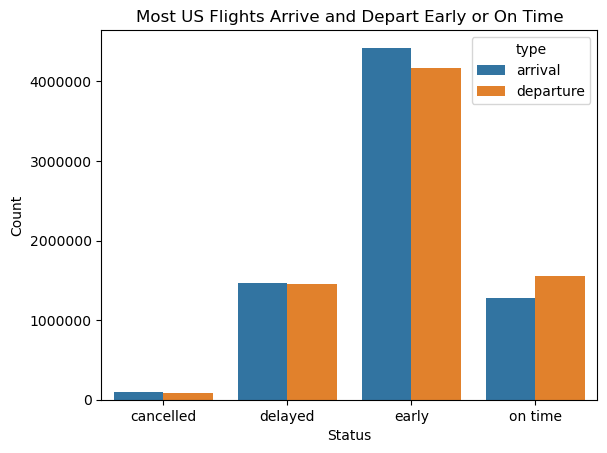

In [23]:
# create a bar plot to compare arrival and departure status counts
fig, ax = plt.subplots()
sns.barplot(data=status_counts, x='status', y='count', hue='type')
plt.title('Most US Flights Arrive and Depart Early or On Time')
plt.ylabel('Count')
plt.xlabel('Status')

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [24]:
flights[['dep_delay', 'arr_delay']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,dep_delay,arr_delay
count,7170781.00,7167044.00
mean,12.16,6.63
std,55.71,57.57
min,-99.00,-119.00
25%,-6.00,-15.00
50%,-2.00,-6.00
75%,9.00,9.00
max,5764.00,5780.00


**Distribution of Departure and Arrival Delays**

Over 75% of flights arrive and depart early and/or on time. 

The range for departures is between 99 minutes early to 5,764 minutes late. The range for arrivals is between 119 minutes early and 5,780 minutes late.

Departure and arrival delays for the top 25th percentile of flights, excluding the maximum, ranges between 9 minutes to 96 hours.

There is at least one huge outlier for departure delay and arrival delay with a delay over 5,700 minutes! Next I will take a closer look at arrival and departure outliers. 

1,415,062 flights experienced an arrival delay of at least 15 minutes and 1,404,198 flights experienced a departure delay of 15 minutes.


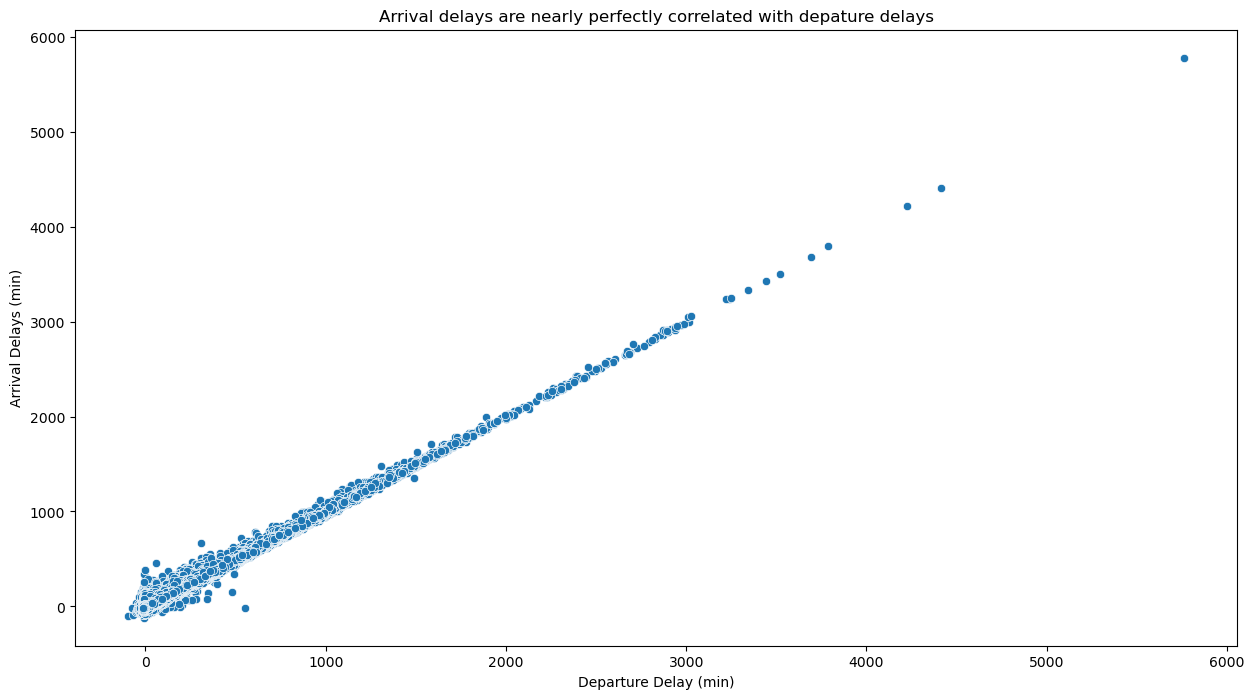

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=flights, x='dep_delay', y='arr_delay')
ax.set(title='Arrival delays are nearly perfectly correlated with depature delays', 
          ylabel='Arrival Delays (min)', 
          xlabel='Departure Delay (min)');


In [26]:
# calculate pearson correlation coefficient between arrival delays and departure delays
flights_corr_df = flights.dropna(subset='arr_delay')
pearsonr(flights_corr_df['dep_delay'], flights_corr_df['arr_delay'])

PearsonRResult(statistic=0.9712458490566458, pvalue=0.0)

The Pearson correlation coefficient of 0.97 indicates a very strong positive linear relationship between departure delays (`DepDelay`) and arrival delays (`ArrDelay`). As departure delays increase, arrival delays increase as well. The p-value of 0.0 confirms that this correlation is statistically significant. This is not as surprising given that after a certain amount of delay, the aircraft cannot make up for lost time during depature inflight due to maximum speeds that can safely be achieved. 

## Arrival and Departure Delay Outliers

In [27]:
def identify_outliers(df, col):
    """
    Calculate the upper and lower bounds to identify outliers in a dataset.

    This function uses the Interquartile Range (IQR) to determine outliers. It computes the IQR for a specified column
    of a pandas DataFrame, and uses this to calculate boundaries that define outliers. Values falling outside of these
    boundaries are considered outliers.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to analyze.
    col (str): The name of the column in the DataFrame for which to calculate the outlier bounds.

    Returns:
    tuple: A tuple containing three elements:
        - upper_bound (float): The upper bound value beyond which data points are considered outliers.
        - lower_bound (float): The lower bound value below which data points are considered outliers.
        - iqr (float): The Interquartile Range (IQR) of the column.
        """
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    return upper_bound, lower_bound, iqr

In [28]:
arr_outlier_upper, arr_outlier_lower, arr_iqr = identify_outliers(flights, 'arr_delay')
print(f'Arrival delay upper outlier bound {arr_outlier_upper}, lower bound {arr_outlier_lower}, and IQR {arr_iqr}.')

dep_outlier_upper, dep_outlier_lower, del_iqr = identify_outliers(flights, 'dep_delay')
print(f'Departure delay upper outlier bound {dep_outlier_upper}, lower bound {dep_outlier_lower}, and IQR {del_iqr}.')

Arrival delay upper outlier bound 45.0, lower bound -51.0, and IQR 24.0.
Departure delay upper outlier bound 31.5, lower bound -28.5, and IQR 15.0.


In [29]:
mask_outlier_arr = (flights['arr_delay'] > arr_outlier_upper)
outlier_delays_arr = flights[mask_outlier_arr]

mask_outlier_dep = (flights['dep_delay'] > dep_outlier_upper)
outlier_delays_dep = flights[mask_outlier_dep]

print('Distribution of arrival delays that are outliers:\n ', outlier_delays_arr['arr_delay'].describe())
print()
print('Distribution of departure delays that are outliers:\n ', outlier_delays_dep['dep_delay'].describe())

Distribution of arrival delays that are outliers:
  count    646053.000000
mean        124.396026
std         137.130514
min          46.000000
25%          60.000000
50%          85.000000
75%         134.000000
max        5780.000000
Name: arr_delay, dtype: float64

Distribution of departure delays that are outliers:
  count    891082.000000
mean        101.299079
std         123.795759
min          32.000000
25%          44.000000
50%          66.000000
75%         111.000000
max        5764.000000
Name: dep_delay, dtype: float64


Although earlier we saw flight departures and arrivals can have some long delays, arrival delays longer than 45 minutes and departure delays more than 31.5 minutes are considered outliers. 

Just over 646,000 flights experience arrival delays greater than the 45 minutes and are considered outliers. Approximately 891,000 flights experienced depature delays greater than 31.5 minutes and are considered outliers. 

### Extreme Outliers (99.9th Percentile of Delays)

In [30]:
quantiles = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 1]

extreme_delays = pd.DataFrame(columns=['Delay Type', 'Quantile', 'Delays (min)'])

for quant in quantiles:
    extreme_delays.loc[len(extreme_delays)] = ['Departure', quant, flights['dep_delay'].quantile(quant)]
    extreme_delays.loc[len(extreme_delays)] = ['Arrival', quant, flights['arr_delay'].quantile(quant)]

extreme_delays.sort_values(['Delay Type', 'Quantile'])

,Delay Type,Quantile,Delays (min)
1,Arrival,0.750,9.0
3,Arrival,0.800,15.0
5,Arrival,0.850,24.0
7,Arrival,0.900,41.0
9,Arrival,0.950,78.0
11,Arrival,0.990,207.0
13,Arrival,0.999,789.0
15,Arrival,1.000,5780.0
0,Departure,0.750,9.0
2,Departure,0.800,15.0


In [31]:
delay_extreme_outliers = (flights['dep_delay'] > flights['dep_delay'].quantile(0.999)) | (flights['arr_delay'] > flights['arr_delay'].quantile(0.999))

delay__extreme_outliers_df = flights[delay_extreme_outliers]

delay__extreme_outliers_df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,7307.000000,7273.000000
mean,1062.155467,1059.136395
std,296.636244,296.985800
min,683.000000,757.000000
25%,878.000000,875.000000
50%,985.000000,981.000000
75%,1142.000000,1141.000000
max,5764.000000,5780.000000


Just over 7,000 flights are in the top 99.9th percentile of departure delays and similar for arrival delays. Even looking at these extreme outliers, there is still a huge range between delays. Extreme departure delays range from 11 hours to 96 hours. Extreme arrival delays  range from 12 hours to 96 hours. 

In [32]:
worst_arr_delay = delay__extreme_outliers_df[delay__extreme_outliers_df['arr_delay'] == delay__extreme_outliers_df['arr_delay'].max()]
worst_arr_delay

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
2594108,2023,2,6,5,1,19805,9680,20452,N118HQ,11278,30852,DCA,VA,12451,31136,JAX,FL,5764.0,1.0,12.0,22.0,6.0,5780.0,1.0,12.0,0,0,124.0,140.0,112.0,634.0,3,5764.0,0.0,16.0,0.0,0.0,0.0,1,"Washington, DC",Jacksonville,2023-06-05 11:53:00,2023-06-05 13:57:00,2023-06-09 11:57:00,2023-06-09 14:17:00,0,0,American Airlines Inc.,Republic Airline,America/New_York,America/New_York,2023-06-05 16:00:00+00:00,2023-06-09 15:57:00+00:00,2023-06-05 18:00:00+00:00,2023-06-09 18:17:00+00:00,0,1501,11,morning,281.52381,-7.0,5764.0,276.333333,-15.0,5780.0,0.0,0.0,21.0,145.02439,-5.0,5764.0,143.146341,-8.0,5780.0,0.0,0.0,41.0,98.04918,-6.0,5764.0,93.721311,-13.0,5780.0,0.0,0.0,61.0,32.868571,-6.0,5764.0,25.125714,-13.0,5780.0,0.0,0.0,175.0,delayed,delayed


American Airlines flight number 9680 in June of 2203 was the flight with the most extreme departure and arrival delay. 

In [33]:
delay__extreme_outliers_df.groupby('airline_mkt')['dep_delay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
airline_mkt,,,,,,,,
American Airlines Inc.,3128.0,1139.503197,393.899929,758.0,887.00,1016.0,1255.00,5764.0
United Air Lines Inc.,1496.0,999.514037,163.757463,683.0,865.00,961.5,1094.25,1860.0
Delta Air Lines Inc.,1325.0,958.206038,115.593689,701.0,865.00,947.0,1036.00,1662.0
JetBlue Airways,422.0,1082.194313,216.486663,740.0,937.00,1037.0,1189.50,2508.0
Allegiant Air,367.0,1121.817439,251.842450,771.0,923.00,1065.0,1261.00,2065.0
Frontier Airlines Inc.,366.0,992.153005,149.482536,749.0,866.25,967.5,1100.50,1393.0
Spirit Air Lines,123.0,980.585366,156.750921,724.0,868.50,940.0,1048.00,1452.0
Hawaiian Airlines Inc.,55.0,1032.145455,184.257008,783.0,896.00,989.0,1139.50,1615.0
Alaska Airlines Inc.,23.0,938.217391,126.737006,776.0,849.50,901.0,1002.00,1280.0


In [34]:
delay__extreme_outliers_df.groupby('airline_mkt')['arr_delay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
airline_mkt,,,,,,,,
American Airlines Inc.,3110.0,1135.421222,394.391783,763.0,883.00,1011.5,1254.00,5780.0
United Air Lines Inc.,1490.0,997.489933,166.011575,773.0,864.00,960.0,1094.00,1898.0
Delta Air Lines Inc.,1319.0,953.197119,116.741374,757.0,859.00,939.0,1031.00,1653.0
JetBlue Airways,420.0,1080.138095,213.568700,774.0,926.75,1035.5,1189.25,2511.0
Allegiant Air,366.0,1124.775956,251.724592,784.0,926.75,1066.5,1269.75,2067.0
Frontier Airlines Inc.,365.0,993.786301,150.457921,768.0,867.00,961.0,1099.00,1416.0
Spirit Air Lines,123.0,980.943089,157.035200,789.0,862.00,945.0,1056.00,1434.0
Hawaiian Airlines Inc.,55.0,1026.345455,183.832474,810.0,888.00,959.0,1133.00,1623.0
Alaska Airlines Inc.,23.0,940.304348,126.005207,769.0,849.00,908.0,1015.00,1294.0


American Airlines has the highest volume of extreme departure and arrival delays, with 3,128 and 3,110 delays respectively. 

By contrast, Southwest Airlines has the lowest volume of extreme delays (only 2 for arrival and 2 for departure)

In [35]:
delay__extreme_outliers_df.groupby(['origin_state', 'dest_state'])[['dep_delay', 'arr_delay']].count().sort_values('arr_delay', ascending=False).head(10)

dep_delay  arr_delay
origin_state dest_state                      
TX           TX                199        199
CA           TX                110        107
FL           NC                105        104
             TX                 86         85
TX           CA                 83         83
CA           NY                 70         70
             CA                 70         69
FL           NY                 68         68
CO           TX                 67         67
CA           AZ                 66         66

In [36]:
delay__extreme_outliers_df.groupby(['dest_state'])[['arr_delay']].count().sort_values('arr_delay', ascending=False).head(10)

,arr_delay
dest_state,
TX,1079
FL,583
NC,529
NY,521
CA,496
IL,476
GA,344
VA,310
AZ,307


In [37]:
delay__extreme_outliers_df.groupby(['origin_state'])[['dep_delay']].count().sort_values('dep_delay', ascending=False).head(10)

,dep_delay
origin_state,
TX,912
FL,735
CA,608
NY,387
IL,381
NC,374
CO,319
VA,262
NV,236


Texas has the highest volume of extreme departure and arrival delays, with 912 and 1,079 delays respectively.

## Flight Characteristics

I want to look at flights with their characteristics, including:
* Carrier
* Date
* Day of Week
* Month
* Quarter
* Holiday
* Season
* Route
* Destination 
* Origin
* Codeshare
* Overnight depature or arrival

I also want to see if there are significant difference between flights that were on time and early vs cancelled or delays based on these features. 

Before pulling in weather data, I want to identify the top 20 airports based on volume and the top 20 airports that experience the most delays over 15 minutes. 

In [38]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaN,NaN,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaN,2023-08-07 11:00:00+00:00,NaN,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,11.666667,4.0,41.0,3.823529,0.0,37.0,3.0,0.0,18.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,12.543860,2.0,154.0,-2.142857,-7.0,124.0,4.0,0.0,57.0,cancelled,cancelled
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,13.944444,4.0,76.0,5.705882,0.0,69.0,3.0,0.0,18.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,13.637931,2.5,154.0,-0.894737,-7.0,124.0,4.0,0.0,58.0,delayed,delayed
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,13.444444,4.0,76.0,5.823529,0.0,69.0,3.0,0.0,18.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,13.220339,2.0,154.0,-1.103448,-7.0,124.0,4.0,0.0,59.0,early,early
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,Amer

In [39]:
completed_flights_df = flights[completed_flights]
cancelled_flights_df = flights[cancelled_flights]

### Airline Carriers (Marketing and Operating)

A codeshare flight is an agreement between airlines to sell seats on each other’s flights. This gives the appearance of airlines flying to more destinations. By doing so, the airlines typically share the revenue on that ticket. The `Airline_Ops` column identifies which airline carrier is oeprating the flight. 

1. Which airlines completed flights in 2023? 
2. Which airlines operated flights in 2023?
3. How many flights were codeshare flights for each airline?
4. How many marketing airlines have codeshare partners?

In [40]:
airline_summary = completed_flights_df.groupby('airline_mkt').agg(
    completed_flights=('airline_mkt', 'size'),
    perc_completed_flights_by_airline=('airline_mkt', lambda x: round(len(x)/total_completed_flights * 100, 2)) # percent of all completed flights for each airline 
)

airline_all_flights = flights.groupby('airline_mkt').agg(all_flights=('airline_mkt', 'size'))

airline_summary = airline_summary.merge(airline_all_flights, on='airline_mkt', how='inner')

In [41]:
airline_summary.sort_values('completed_flights', ascending=False)

,completed_flights,perc_completed_flights_by_airline,all_flights
airline_mkt,,,
American Airlines Inc.,1733862,24.19,1754435
Delta Air Lines Inc.,1463199,20.42,1481380
Southwest Airlines Co.,1421238,19.83,1435563
United Air Lines Inc.,1272192,17.75,1294303
Alaska Airlines Inc.,382074,5.33,384923
JetBlue Airways,267915,3.74,273678
Spirit Air Lines,258838,3.61,263324
Frontier Airlines Inc.,173459,2.42,177233
Allegiant Air,114425,1.60,115207


In [42]:
airline_performance = flights.groupby(['airline_mkt', 'arrival_status'])['arrival_status'].value_counts().reset_index(name='count')
airline_performance = airline_performance.pivot(index='airline_mkt', columns='arrival_status', values='count')
airline_performance

arrival_status,cancelled,delayed,early,on time
airline_mkt,,,,
Alaska Airlines Inc.,2849,69227,229309,83538
Allegiant Air,782,29653,63570,21202
American Airlines Inc.,20573,346228,1093700,293934
Delta Air Lines Inc.,18181,223381,1028855,210963
Frontier Airlines Inc.,3774,54525,88597,30337
Hawaiian Airlines Inc.,1053,18958,34239,26645
JetBlue Airways,5763,83550,142751,41614
Southwest Airlines Co.,14325,309963,798503,312772
Spirit Air Lines,4486,75428,136578,46832


In [43]:
airline_performance_summary = airline_performance.merge(airline_summary, on='airline_mkt', how='inner')
airline_performance_summary = airline_performance_summary.rename_axis(None, axis=1)\
    .rename_axis(None, axis=1).reset_index()
airline_performance_summary

,airline_mkt,cancelled,delayed,early,on time,completed_flights,perc_completed_flights_by_airline,all_flights
0,Alaska Airlines Inc.,2849,69227,229309,83538,382074,5.33,384923
1,Allegiant Air,782,29653,63570,21202,114425,1.60,115207
2,American Airlines Inc.,20573,346228,1093700,293934,1733862,24.19,1754435
3,Delta Air Lines Inc.,18181,223381,1028855,210963,1463199,20.42,1481380
4,Frontier Airlines Inc.,3774,54525,88597,30337,173459,2.42,177233
5,Hawaiian Airlines Inc.,1053,18958,34239,26645,79842,1.11,80895
6,JetBlue Airways,5763,83550,142751,41614,267915,3.74,273678
7,Southwest Airlines Co.,14325,309963,798503,312772,1421238,19.83,1435563
8,Spirit Air Lines,4486,75428,136578,46832,258838,3.61,263324
9,United Air Lines Inc.,22111,253626,807823,210743,1272192,17.75,1294303


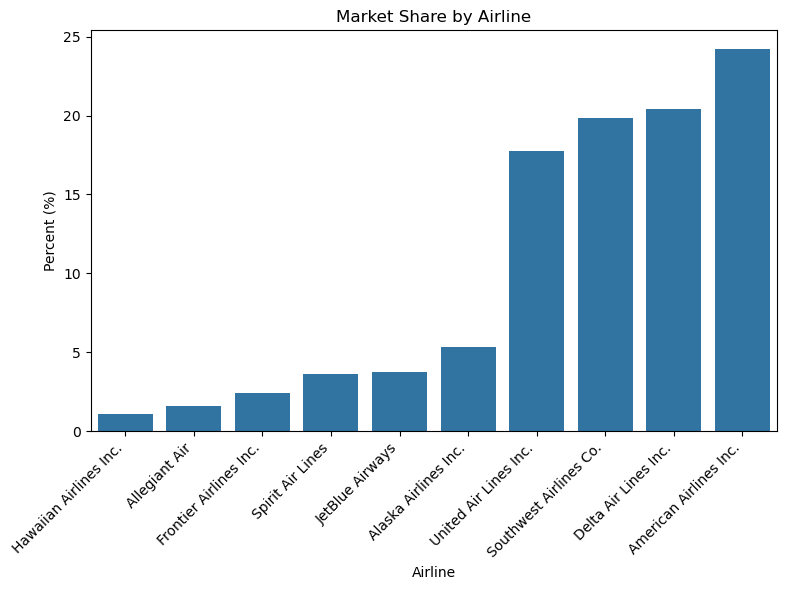

In [44]:
# create a bar plot to look  at market share by airline
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=airline_performance_summary.sort_values('perc_completed_flights_by_airline'), x='airline_mkt', y='perc_completed_flights_by_airline')
plt.title('Market Share by Airline')
plt.ylabel('Percent (%)')
plt.xlabel('Airline')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
performance_cols = ['cancelled', 'delayed', 'early', 'on time', 'completed_flights']

for col in performance_cols:
    new_col = f'{col}_rate_by_airline'
    airline_performance_summary[new_col] = round(airline_performance_summary[col] / airline_performance_summary['all_flights'] * 100, 2)

In [46]:
airline_performance_summary

,airline_mkt,cancelled,delayed,early,on time,completed_flights,perc_completed_flights_by_airline,all_flights,cancelled_rate_by_airline,delayed_rate_by_airline,early_rate_by_airline,on time_rate_by_airline,completed_flights_rate_by_airline
0,Alaska Airlines Inc.,2849,69227,229309,83538,382074,5.33,384923,0.74,17.98,59.57,21.70,99.26
1,Allegiant Air,782,29653,63570,21202,114425,1.60,115207,0.68,25.74,55.18,18.40,99.32
2,American Airlines Inc.,20573,346228,1093700,293934,1733862,24.19,1754435,1.17,19.73,62.34,16.75,98.83
3,Delta Air Lines Inc.,18181,223381,1028855,210963,1463199,20.42,1481380,1.23,15.08,69.45,14.24,98.77
4,Frontier Airlines Inc.,3774,54525,88597,30337,173459,2.42,177233,2.13,30.76,49.99,17.12,97.87
5,Hawaiian Airlines Inc.,1053,18958,34239,26645,79842,1.11,80895,1.30,23.44,42.33,32.94,98.70
6,JetBlue Airways,5763,83550,142751,41614,267915,3.74,273678,2.11,30.53,52.16,15.21,97.89
7,Southwest Airlines Co.,14325,309963,798503,312772,1421238,19.83,1435563,1.00,21.59,55.62,21.79,99.00
8,Spirit Air Lines,4486,75428,136578,46832,258838,3.61,263324,1.70,28.64,51.87,17.78,98.30
9,United Air Lines Inc.,22111,253626,807823,210743,1272192,17.75,1294303,1.71,19.60,62.41,16.28,98.29


/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_75604/592736232.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_75604/592736232.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_75604/592736232.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn

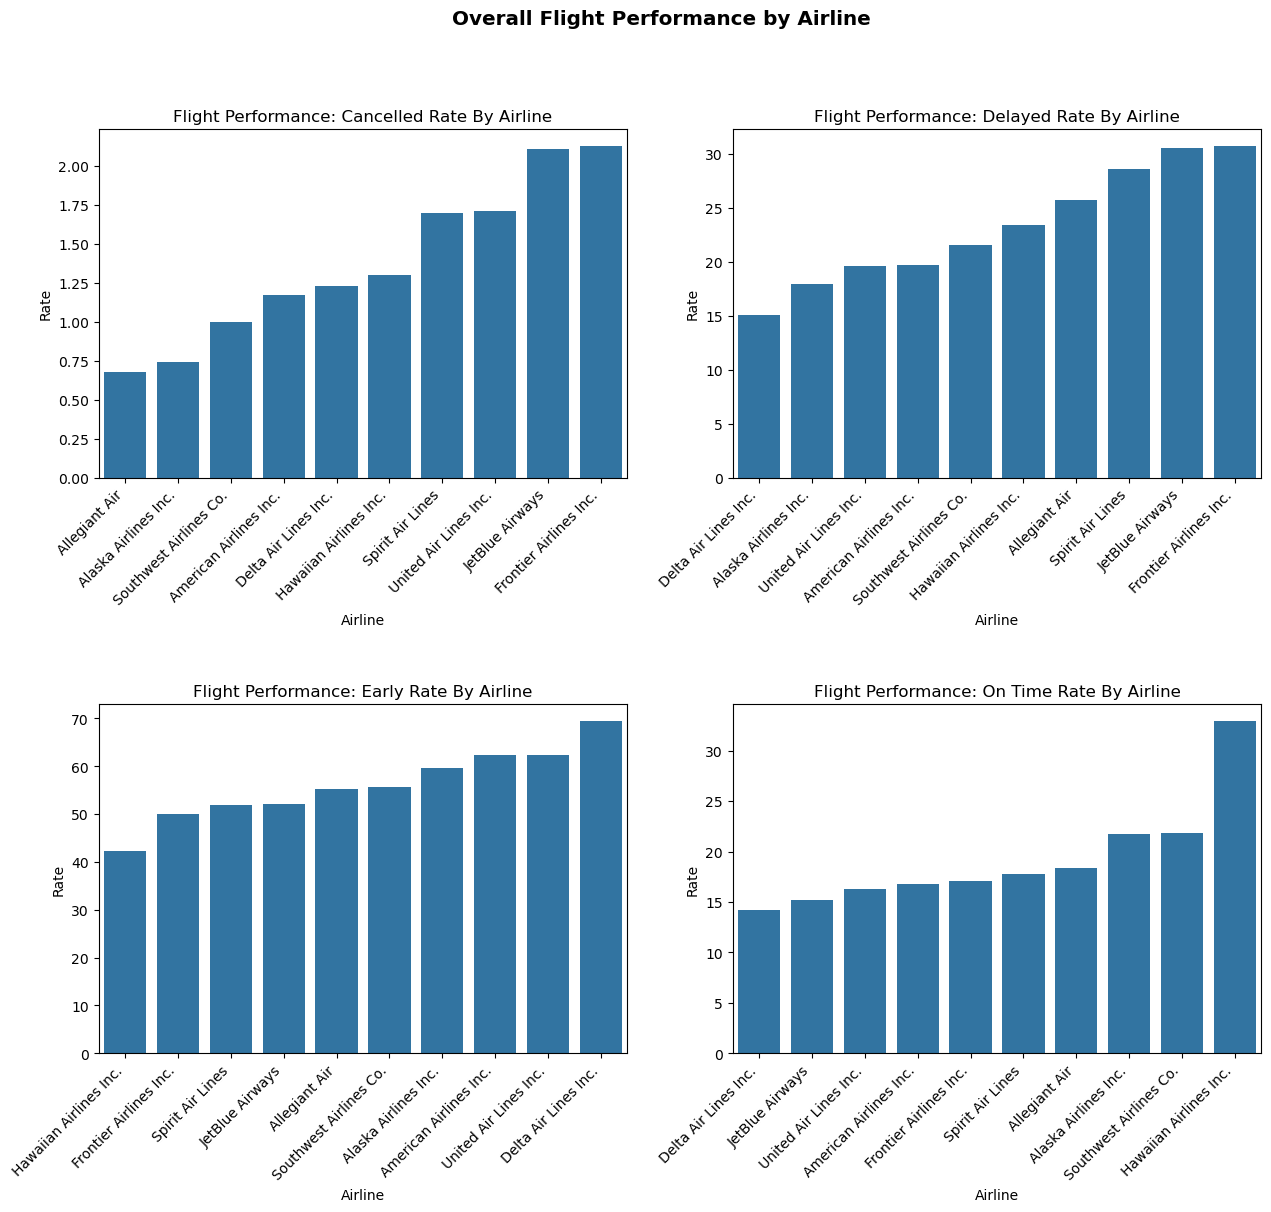

In [47]:
# create a bar plot to compare airline flight totals
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

performance_cols = ['cancelled_rate_by_airline', 'delayed_rate_by_airline', 'early_rate_by_airline', 'on time_rate_by_airline']

for i, col in enumerate(performance_cols):
    sns.barplot(data=airline_performance_summary.sort_values(col), x='airline_mkt', y=col, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'Flight Performance: {col.replace("_", " ").title()}')
    ax[i // 2, i % 2].set_ylabel('Rate')
    ax[i // 2, i % 2].set_xlabel('Airline')
    ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')

plt.suptitle('Overall Flight Performance by Airline', fontsize='x-large', fontweight='bold')
plt.subplots_adjust(hspace=0.65)
plt.tight_layout(rect=[0, 0, 0, 0.95])
plt.show()

#### Code Share Flights

In [48]:
airline_operators_sumamry = flights.groupby('airline_ops').agg(
    flight_counts=('airline_ops', 'size'),
    market_share=('airline_ops', lambda x: round(len(x)/total_completed_flights * 100, 2)),
    total_cancellations=('cancelled', 'sum')
    )

In [49]:
flights['code_share_flight'].value_counts(normalize=True)

code_share_flight
0    0.721918
1    0.278082
Name: proportion, dtype: float64

In [50]:
print('The total number of airline operators is: ', flights['airline_ops'].nunique())

The total number of airline operators is:  21


In [51]:
airline_operators_sumamry['cancellation_rate_by_airline'] = round(airline_operators_sumamry['total_cancellations'] / airline_operators_sumamry['flight_counts'] * 100, 2)
airline_operators_sumamry.sort_values('cancellation_rate_by_airline', ascending=False)

,flight_counts,market_share,total_cancellations,cancellation_rate_by_airline
airline_ops,,,,
GoJet Airlines LLC d/b/a United Express,44976,0.63,1474,3.28
Republic Airline,295028,4.12,8160,2.77
Frontier Airlines Inc.,177233,2.47,3774,2.13
JetBlue Airways,273678,3.82,5763,2.11
Endeavor Air Inc.,201144,2.81,4233,2.10
Mesa Airlines Inc.,88384,1.23,1767,2.00
Spirit Air Lines,263324,3.67,4486,1.70
CommuteAir LLC dba CommuteAir,70600,0.99,1027,1.45
United Air Lines Inc.,730302,10.19,10270,1.41


In [52]:
round(airline_operators_sumamry['cancellation_rate_by_airline'].mean(), 4)

1.4795

In [53]:
airline_operators = flights.groupby(['airline_mkt', 'cancelled']).agg(
    num_codeshare=('code_share_flight','sum'),
    num_flights=('airline_mkt', 'count'))
airline_operators['perc_code_share'] = round(airline_operators['num_codeshare'] / airline_operators['num_flights'] *100, 2)
airline_operators

num_codeshare  num_flights  perc_code_share
airline_mkt            cancelled                                             
Alaska Airlines Inc.   0                 139431       382074            36.49
                       1                    872         2849            30.61
Allegiant Air          0                      0       114425             0.00
                       1                      0          782             0.00
American Airlines Inc. 0                 805804      1733862            46.47
                       1                  10595        20573            51.50
Delta Air Lines Inc.   0                 490268      1463199            33.51
                       1                   8165        18181            44.91
Frontier Airlines Inc. 0                      0       173459             0.00
                       1                      0         3774             0.00
Hawaiian Airlines Inc. 0                      0        79842             0.00
                       1                      0         1053             0.00
JetBlue Airways        0                      0       267915             0.00
                       1                      0         5763             0.00
Southwest Airlines Co. 0                      0      1421238             0.00
                       1                      0        14325             0.00
Spirit Air Lines       0                      0       258838             0.00
                       1                      0         4486             0.00
United Air Lines Inc.  0                 552160      1272192            43.40
                       1                  11841        22111            53.55

In [54]:
mask = flights['airline_ops'] != flights['airline_mkt']
mkt_code_share_partners = flights[mask].groupby(['airline_mkt', 'airline_ops'])['airline_ops'].size()
mkt_code_share_partners

airline_mkt             airline_ops                            
Alaska Airlines Inc.    Horizon Air                                 68471
                        SkyWest Airlines Inc.                       71832
American Airlines Inc.  Air Wisconsin Airlines Corp                 37578
                        Envoy Air                                  227002
                        Mesa Airlines Inc.                           9588
                        PSA Airlines Inc.                          193703
                        Piedmont Airlines                           98660
                        Republic Airline                           129519
                        SkyWest Airlines Inc.                      120349
Delta Air Lines Inc.    Endeavor Air Inc.                          201144
                        Republic Airline                            82814
                        SkyWest Airlines Inc.                      214475
United Air Lines Inc.   Air Wisconsin Airlines C

In [55]:
mask = flights['airline_ops'] != flights['airline_mkt']
airline_operators = flights[mask].groupby(['airline_ops', 'airline_mkt'])['airline_ops'].size()
airline_operators

airline_ops                              airline_mkt           
Air Wisconsin Airlines Corp              American Airlines Inc.     37578
                                         United Air Lines Inc.      20356
CommuteAir LLC dba CommuteAir            United Air Lines Inc.      70600
Endeavor Air Inc.                        Delta Air Lines Inc.      201144
Envoy Air                                American Airlines Inc.    227002
GoJet Airlines LLC d/b/a United Express  United Air Lines Inc.      44976
Horizon Air                              Alaska Airlines Inc.       68471
Mesa Airlines Inc.                       American Airlines Inc.      9588
                                         United Air Lines Inc.      78796
PSA Airlines Inc.                        American Airlines Inc.    193703
Piedmont Airlines                        American Airlines Inc.     98660
Republic Airline                         American Airlines Inc.    129519
                                         Delta A

In [56]:
code_share_partners = flights.groupby('airline_mkt')['airline_ops'].nunique().reset_index(name='count')
code_share_partners['partners_count'] = code_share_partners['count'] - 1
code_share_partners.drop(columns='count').sort_values('partners_count', ascending=False)

,airline_mkt,partners_count
2,American Airlines Inc.,7
9,United Air Lines Inc.,6
3,Delta Air Lines Inc.,3
0,Alaska Airlines Inc.,2
1,Allegiant Air,0
4,Frontier Airlines Inc.,0
5,Hawaiian Airlines Inc.,0
6,JetBlue Airways,0
7,Southwest Airlines Co.,0
8,Spirit Air Lines,0


**Flights by Airline Summary**

### Temporal Affects on Flight Performance

In [57]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaN,NaN,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaN,2023-08-07 11:00:00+00:00,NaN,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,11.666667,4.0,41.0,3.823529,0.0,37.0,3.0,0.0,18.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,12.543860,2.0,154.0,-2.142857,-7.0,124.0,4.0,0.0,57.0,cancelled,cancelled
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,13.944444,4.0,76.0,5.705882,0.0,69.0,3.0,0.0,18.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,13.637931,2.5,154.0,-0.894737,-7.0,124.0,4.0,0.0,58.0,delayed,delayed
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,13.444444,4.0,76.0,5.823529,0.0,69.0,3.0,0.0,18.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,13.220339,2.0,154.0,-1.103448,-7.0,124.0,4.0,0.0,59.0,early,early
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,Amer

In [76]:
def plot_temporal_distribution(df, time_col):
    
    status_types = df['arrival_status'].unique().tolist()
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

    for i, status in enumerate(status_types):
        plot_data = df[df['arrival_status'] == status]
       
        # Group data by time_col and count the number of flights
        grouped_data = plot_data.groupby(time_col)['flight_number_marketing_airline'].size().reset_index(name='flight_count')
        
        sns.barplot(x=grouped_data[time_col], y=grouped_data['flight_count'], ax=ax[i // 2, i % 2])
        
        ax[i // 2, i % 2].set_title(f'{status.title()} Flights Distribution by {time_col.replace("_", " ").title()}')
        ax[i // 2, i % 2].set_ylabel('Number of Flights')
        ax[i // 2, i % 2].set_xlabel(f'{time_col.replace("_", " ").title()}')

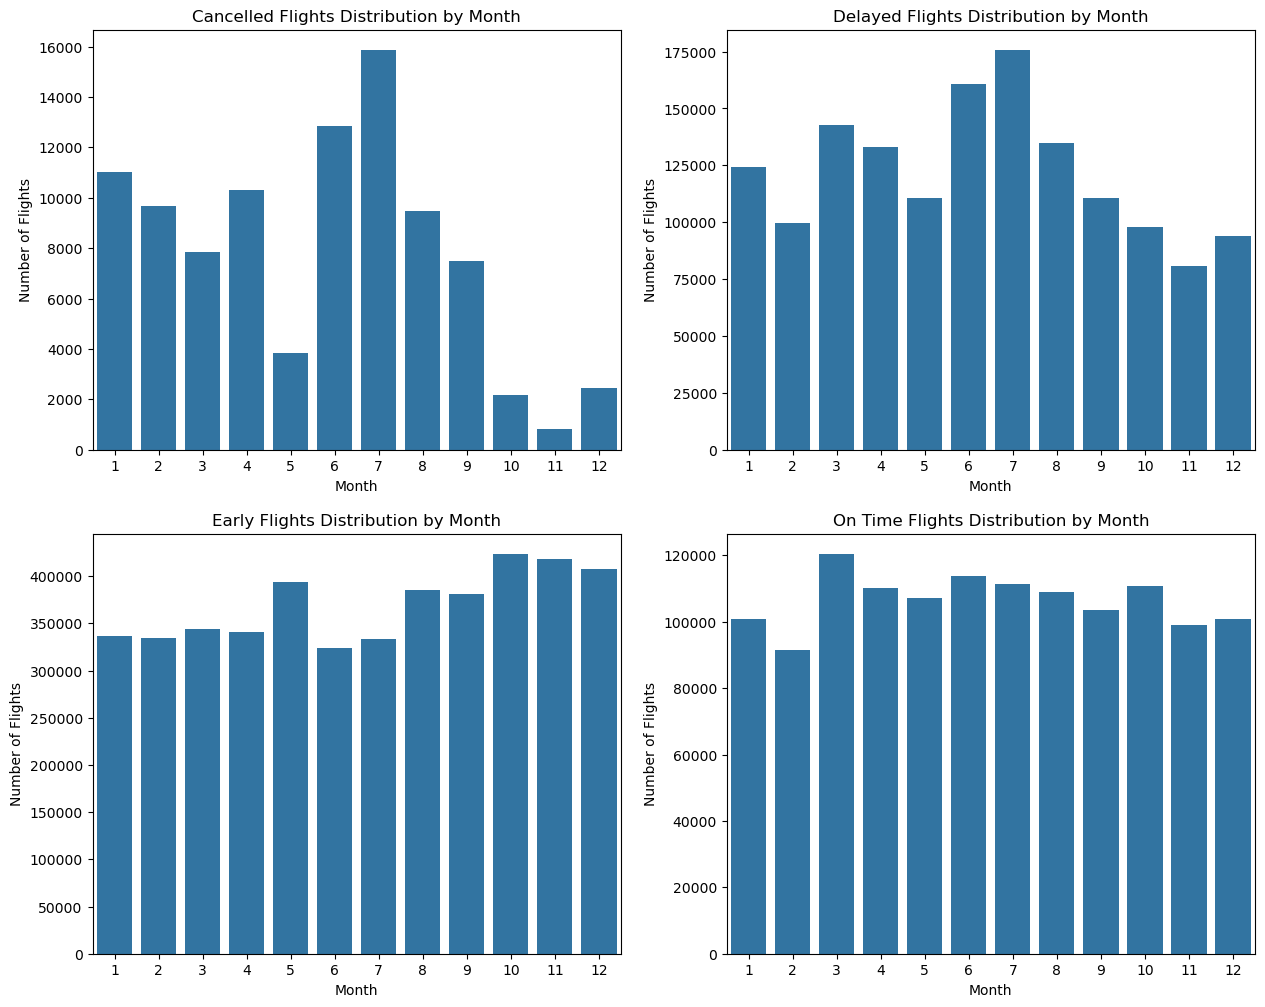

In [77]:
plot_temporal_distribution(flights, 'month')

In [80]:
flights_time_index = flights.set_index('scheduled_departure_datetime_utc').sort_index()

In [83]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260941 entries, 0 to 7260940
Data columns (total 97 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   year                              int64  
 1   quarter                           int64  
 2   month                             int64  
 3   day_of_month                      int64  
 4   day_of_week                       int64  
 5   marketing_airline_id              int64  
 6   flight_number_marketing_airline   int64  
 7   operating_airline_id              int64  
 8   tail_number                       object 
 9   origin_airport_id                 int64  
 10  origin_city_market_id             int64  
 11  origin                            object 
 12  origin_state                      object 
 13  dest_airport_id                   int64  
 14  dest_city_market_id               int64  
 15  dest                              object 
 16  dest_state                        ob

In [81]:
flights_time_index

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_20D,dep_delay_median_20D,dep_delay_max_20D,arr_delay_mean_20D,arr_delay_median_20D,arr_delay_max_20D,cancelled_sum_20D,div_airport_landings_sum_20D,n_flights_20D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
scheduled_departure_datetime_utc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-31 22:00:00+00:00,2023,1,1,1,7,19977,200,19977,N2846U,12016,32016,GUM,TT,12173,32134,HNL,HI,49.0,1.0,3.0,14.0,7.0,38.0,1.0,2.0,0,0,435.0,424.0,403.0,3801.0,11,38.0,0.0,0.0,0.0,0.0,0.0,0,Guam,Honolulu,2023-01-01 07:35:00,2023-01-01 18:50:00,2023-01-01 08:24:00,2023-01-01 19:28:00,0,0,United Air Lines Inc.,United Air Lines Inc.,Pacific/Guam,Pacific/Honolulu,2022-12-31 22:24:00+00:00,2023-01-02 05:00:00+00:00,2023-01-02 05:28:00+00:00,1,2567,7,morning,49.00,49.0,49.0,38.0,38.0,38.0,0.0,0.0,1.0,49.000000,49.0,49.0,38.000000,38.0,38.0,0.0,0.0,1.0,49.000000,49.0,49.0,38.000000,38.0,38.0,0.0,0.0,1.0,49.000000,49.0,49.0,38.000000,38.0,38.0,0.0,0.0,1.0,delayed,delayed
2022-12-31 22:00:00+00:00,2023,1,1,1,7,19977,174,19977,N34282,12016,32016,GUM,TT,14955,34955,SPN,TT,-11.0,0.0,-1.0,17.0,4.0,-11.0,0.0,-1.0,0,0,46.0,46.0,25.0,129.0,1,NaN,NaN,NaN,NaN,NaN,0.0,0,Guam,Saipan,2023-01-01 08:00:00,2023-01-01 08:46:00,2023-01-01 07:49:00,2023-01-01 08:35:00,0,0,United Air Lines Inc.,United Air Lines Inc.,Pacific/Guam,Pacific/Saipan,2022-12-31 21:49:00+00:00,2022-12-31 23:00:00+00:00,2022-12-31 22:35:00+00:00,1,2568,8,morning,-11.00,-11.0,-11.0,-11.0,-11.0,-11.0,0.0,0.0,1.0,-11.000000,-11.0,-11.0,-11.000000,-11.0,-11.0,0.0,0.0,1.0,-11.000000,-11.0,-11.0,-11.000000,-11.0,-11.0,0.0,0.0,1.0,-11.000000,-11.0,-11.0,-11.000000,-11.0,-11.0,0.0,0.0,1.0,early,early
2023-01-01 00:00:00+00:00,2023,1,1,1,7,19977,117,19977,N34282,14955,34955,SPN,TT,12016,32016,GUM,TT,-3.0,0.0,-1.0,11.0,4.0,-4.0,0.0,-1.0,0,0,45.0,44.0,29.0,129.0,1,NaN,NaN,NaN,NaN,NaN,0.0,0,Saipan,Guam,2023-01-01 09:50:00,2023-01-01 10:35:00,2023-01-01 09:47:00,2023-01-01 10:31:00,0,0,United Air Lines Inc.,United Air Lines Inc.,Pacific/Saipan,Pacific/Guam,2022-12-31 23:47:00+00:00,2023-01-01 01:00:00+00:00,2023-01-01 00:31:00+00:00,1,6273,9,morning,-3.00,-3.0,-3.0,-4.0,-4.0,-4.0,0.0,0.0,1.0,-3.000000,-3.0,-3.0,-4.000000,-4.0,-4.0,0.0,0.0,1.0,-3.000000,-3.0,-3.0,-4.000000,-4.0,-4.0,0.0,0.0,1.0,-3.000000,-3.0,-3.0,-4.000000,-4.0,-4.0,0.0,0.0,1.0,early,early
2023-01-01 05:00:00+00:00,2023,1,1,1,7,20436,109,20436,N329FR,14843,34819,SJU,PR,14100,34100,PHL,PA,12.0,0.0,0.0,20.0,17.0,29.0,1.0,1.0,0,0,252.0,269.0,232.0,1576.0,7,11.0,0.0,18.

ValueError: x and y must have same first dimension, but have shapes (7260941,) and (1,)

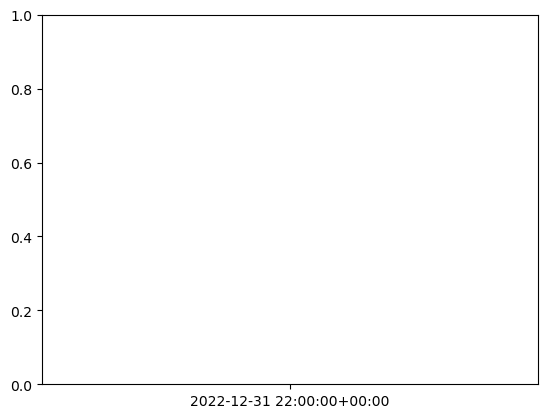

### Origin and Destination Distributions

**Questions to investigate:**
1. What are the top 20 origins based on volume?
2. What are the top 20 destinations based on volume?
3. What are the top 20 airports with the most cancelled flights based on volume?
4. What are the top 20 airport with the most cancellations based on the proportion of scheduled flights for each airport?
5. What are the top 20 airports with the most arrival delays based on volume?
6. What are the top 20 airports with the most arrival delays based on the proportion of scheduled flights for each airport?

In [78]:
# calculate top 20 origins for completed flights
origin_flights_df = completed_flights_df.groupby(['origin_state','origin', 'origin_city']).size().sort_values(ascending=False).reset_index(name='total_flights')
origin_flights_df.head(20)

,origin_state,origin,origin_city,total_flights
0,GA,ATL,Atlanta,333375
1,CO,DEN,Denver,294342
2,IL,ORD,Chicago,290810
3,TX,DFW,Dallas/Fort Worth,284994
4,NC,CLT,Charlotte,222660
5,CA,LAX,Los Angeles,193489
6,NV,LAS,Las Vegas,189115
7,WA,SEA,Seattle,179687
8,AZ,PHX,Phoenix,177891
9,NY,LGA,New York,161984


In [79]:
#calculate top 20 destinations for completed flights
dest_flights_df = completed_flights_df.groupby(['dest_state','dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_flights')
top_20_dest = dest_flights_df.head(20)
top_20_dest

,dest_state,dest,destination_city,dest_airport_id,total_flights
0,GA,ATL,Atlanta,10397,333384
1,CO,DEN,Denver,11292,293676
2,IL,ORD,Chicago,13930,290476
3,TX,DFW,Dallas/Fort Worth,11298,284704
4,NC,CLT,Charlotte,11057,222710
5,CA,LAX,Los Angeles,12892,193649
6,NV,LAS,Las Vegas,12889,189153
7,WA,SEA,Seattle,14747,179608
8,AZ,PHX,Phoenix,14107,177959
9,NY,LGA,New York,12953,161811


The top 20 origins are the same top 20 destinations for completed flights. 

Text(0, 0.5, 'Total Completed Flights')

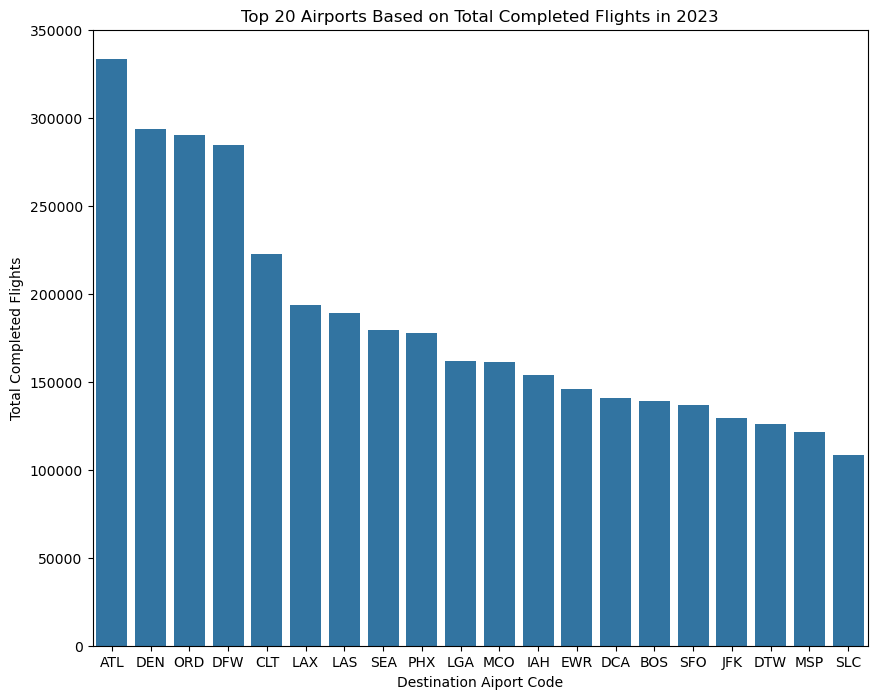

In [80]:
# plot top 20 destinations as a bar plot
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_20_dest, x='dest', y='total_flights')
plt.title('Top 20 Airports Based on Total Completed Flights in 2023')
plt.xlabel('Destination Aiport Code')
plt.ylabel('Total Completed Flights')

In [81]:
# calculate number of cancelled flights for each airport
dest_flights_canc_df = cancelled_flights_df.groupby(['dest_state','dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_cancelled')

# top 20 airports based on total cancellations
dest_flights_canc_df.head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled
0,TX,DFW,Dallas/Fort Worth,11298,4691
1,CO,DEN,Denver,11292,4587
2,NJ,EWR,Newark,11618,4574
3,NY,LGA,New York,12953,4553
4,IL,ORD,Chicago,13930,3932
5,NY,JFK,New York,12478,3158
6,GA,ATL,Atlanta,10397,2915
7,MA,BOS,Boston,10721,2606
8,NV,LAS,Las Vegas,12889,2340
9,FL,MCO,Orlando,13204,2338


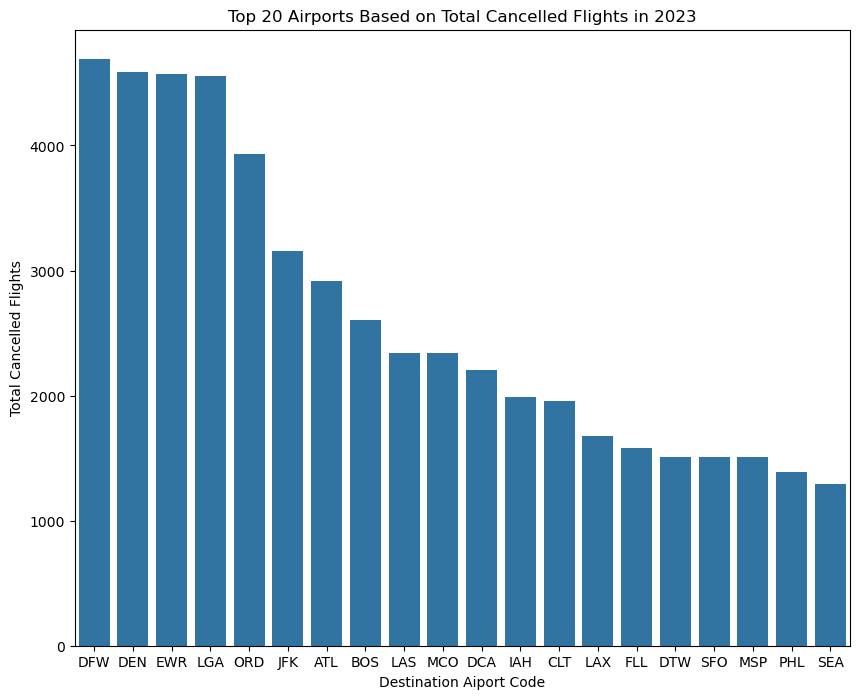

In [82]:
# plot airports based on total cancellations
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dest_flights_canc_df.head(20), x='dest', y='total_cancelled')
plt.title('Top 20 Airports Based on Total Cancelled Flights in 2023')
plt.xlabel('Destination Aiport Code')
plt.ylabel('Total Cancelled Flights');

In [83]:
top_20_set = set(top_20_dest['dest'])
top_20_canc_set = set(dest_flights_canc_df.head(20)['dest'])

aiport_diff = top_20_set - top_20_canc_set
airport_diff_rev = top_20_canc_set - top_20_set
print(f'The airports from top 20 destinations not in top 20 cancellations are {aiport_diff}. \n')
print(f'The airports from top 20 cancellations not in top 20 destinations are {airport_diff_rev}.')

The airports from top 20 destinations not in top 20 cancellations are {'SLC', 'PHX'}. 

The airports from top 20 cancellations not in top 20 destinations are {'PHL', 'FLL'}.


The Salt Lake City and Phoenix airports are in the top 20 airports based on volume, but not in the top 20 for cancellations. 

The Philadelphia and Fort Lauderdale aiports are in the top 20 airports based on cancellations but not in the top 20 for volume. 

In [84]:
# calculate proportion of cancelled flights at each aiport
dest_flights_canc_df['scheduled_flights'] = dest_flights_canc_df['dest'].map(flights.groupby('dest').size()).fillna(0)
dest_flights_canc_df['proportion_cancelled'] = dest_flights_canc_df['total_cancelled'] / dest_flights_canc_df['scheduled_flights'].replace(0, np.nan)
dest_flights_canc_df.sort_values('total_cancelled', ascending=False).head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled,scheduled_flights,proportion_cancelled
0,TX,DFW,Dallas/Fort Worth,11298,4691,289395,0.016210
1,CO,DEN,Denver,11292,4587,298263,0.015379
2,NJ,EWR,Newark,11618,4574,150565,0.030379
3,NY,LGA,New York,12953,4553,166364,0.027368
4,IL,ORD,Chicago,13930,3932,294408,0.013356
5,NY,JFK,New York,12478,3158,132701,0.023798
6,GA,ATL,Atlanta,10397,2915,336299,0.008668
7,MA,BOS,Boston,10721,2606,141547,0.018411
8,NV,LAS,Las Vegas,12889,2340,191493,0.012220
9,FL,MCO,Orlando,13204,2338,163711,0.014281


In [85]:
# top 20 airports based on highest proportions of cancelled flights
dest_flights_canc_df.sort_values('proportion_cancelled', ascending=False).head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled,scheduled_flights,proportion_cancelled
307,AK,ADK,Adak Island,10165,8,103,0.077670
161,ME,PQI,Presque Isle/Houlton,14231,48,641,0.074883
345,CO,PUB,Pueblo,14288,2,27,0.074074
271,MA,HYA,Hyannis,12250,13,206,0.063107
115,NY,ITH,Ithaca/Cortland,12397,88,1441,0.061069
56,CO,ASE,Aspen,10372,350,6347,0.055144
181,NE,LBF,North Platte,12899,37,675,0.054815
178,MI,CMX,Hancock/Houghton,11076,38,697,0.054519
165,WY,COD,Cody,11097,45,827,0.054414
211,AK,DLG,Dillingham,11336,27,501,0.053892


The top 20 airports with the highest proportion of cancellations are much smaller airports by volume compared to the aiports with the most cancellations. Most of these airports had less than 2,000 scheduled flights in 2023, except for Aspen which had over 6,300 flights scheduled. 

In [86]:
delayed_flights_df = flights[flights['arrival_status'] == 'delayed']
dest_flights_del_df = delayed_flights_df.groupby(['dest_state', 'dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_delays')
dest_flights_del_df.head(20)

,dest_state,dest,destination_city,dest_airport_id,total_delays
0,CO,DEN,Denver,11292,62805
1,TX,DFW,Dallas/Fort Worth,11298,60305
2,IL,ORD,Chicago,13930,56837
3,GA,ATL,Atlanta,10397,55727
4,NV,LAS,Las Vegas,12889,48933
5,FL,MCO,Orlando,13204,43686
6,NC,CLT,Charlotte,11057,41535
7,CA,LAX,Los Angeles,12892,40075
8,AZ,PHX,Phoenix,14107,35485
9,MA,BOS,Boston,10721,33090


In [87]:
top_20_del_set = set(dest_flights_del_df.head(20)['dest'])

aiport_diff = top_20_set - top_20_del_set
airport_diff_rev = top_20_del_set - top_20_set
airport_diff_canc_del = top_20_del_set - top_20_canc_set
airport_diff_canc_del_rev = top_20_canc_set - top_20_del_set

print(f'The airports from top 20 destinations not in top 20 delays are {aiport_diff}. \n')
print(f'The airports from top 20 delays not in top 20 destinations are {airport_diff_rev}.\n')
print(f'The airports from top 20 delays not in top 20 cancellations are {airport_diff_canc_del}.\n')
print(f'The airports from top 20 cancelled not in top 20 delays are {airport_diff_canc_del_rev}.')

The airports from top 20 destinations not in top 20 delays are {'SLC', 'DTW', 'MSP'}. 

The airports from top 20 delays not in top 20 destinations are {'MIA', 'PHL', 'FLL'}.

The airports from top 20 delays not in top 20 cancellations are {'MIA', 'PHX'}.

The airports from top 20 cancelled not in top 20 delays are {'DTW', 'MSP'}.


There is a lot of overlap between top airports based on volumes by destination, volume of cancelled flights, and volume of delayed flights. I want to limit the total number of airports for which I get weather data to 20 due to the size of the data. I will first select the top 15 airports based on volume and then add the next 5 that are not in the top 15 but are in the top cancellations and delays in that order. 

In [88]:
# set `Dest` as index for destinations, cancellations and delays dataframes
top_dest_flights_df = dest_flights_df.set_index('dest')
cancellations_sorted_df = dest_flights_canc_df.set_index('dest')
delayed_sorted_df = dest_flights_del_df.set_index('dest')

In [89]:
merged_df = top_dest_flights_df.merge(cancellations_sorted_df[['total_cancelled']], on=['dest'], how='outer')\
                .merge(delayed_sorted_df[['total_delays']], on=['dest'], how='outer')

In [90]:
# only keep top 15 airports based on total flights
top_15_volume = merged_df.sort_values('total_flights', ascending=False).head(15)

# get remaining 5 airports based on cancellations and delays that are not in top 15 by volume
remaining_airports = merged_df[~merged_df.index.isin(top_15_volume.index)]
additional_airports = remaining_airports.sort_values(['total_cancelled', 'total_delays'], ascending=False)

# combine with top 15 by volume
final_airports = pd.concat([top_15_volume, additional_airports])

final_airports.head(20)

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays
dest,,,,,,
ATL,GA,Atlanta,10397,333384,2915.0,55727
DEN,CO,Denver,11292,293676,4587.0,62805
ORD,IL,Chicago,13930,290476,3932.0,56837
DFW,TX,Dallas/Fort Worth,11298,284704,4691.0,60305
CLT,NC,Charlotte,11057,222710,1956.0,41535
LAX,CA,Los Angeles,12892,193649,1680.0,40075
LAS,NV,Las Vegas,12889,189153,2340.0,48933
SEA,WA,Seattle,14747,179608,1291.0,28950
PHX,AZ,Phoenix,14107,177959,1270.0,35485


In [91]:
# map each state to a region and division based on US Census Standards
region_mapping = {
    "CT": ("Northeast", "New England"), 
    "ME": ("Northeast", "New England"), 
    "MA": ("Northeast", "New England"),
    "NH": ("Northeast", "New England"), 
    "RI": ("Northeast", "New England"), 
    "VT": ("Northeast", "New England"),
    "NJ": ("Northeast", "Middle Atlantic"), 
    "NY": ("Northeast", "Middle Atlantic"), 
    "PA": ("Northeast", "Middle Atlantic"),
    "IL": ("Midwest", "East North Central"), 
    "IN": ("Midwest", "East North Central"), 
    "MI": ("Midwest", "East North Central"),
    "OH": ("Midwest", "East North Central"), 
    "WI": ("Midwest", "East North Central"),
    "IA": ("Midwest", "West North Central"), 
    "KS": ("Midwest", "West North Central"), 
    "MN": ("Midwest", "West North Central"),
    "MO": ("Midwest", "West North Central"), 
    "NE": ("Midwest", "West North Central"), 
    "ND": ("Midwest", "West North Central"), 
    "SD": ("Midwest", "West North Central"),
    "DE": ("South", "South Atlantic"), 
    "FL": ("South", "South Atlantic"), 
    "GA": ("South", "South Atlantic"),
    "MD": ("South", "South Atlantic"), 
    "NC": ("South", "South Atlantic"), 
    "SC": ("South", "South Atlantic"),
    "VA": ("South", "South Atlantic"),
    "DC": ("South", "South Atlantic"), 
    "WV": ("South", "South Atlantic"),
    "AL": ("South", "East South Central"), 
    "KY": ("South", "East South Central"), 
    "MS": ("South", "East South Central"),
    "TN": ("South", "East South Central"),
    "AR": ("South", "West South Central"), 
    "LA": ("South", "West South Central"), 
    "OK": ("South", "West South Central"), 
    "TX": ("South", "West South Central"),
    "AZ": ("West", "Mountain"), 
    "CO": ("West", "Mountain"), 
    "ID": ("West", "Mountain"), 
    "MT": ("West", "Mountain"),
    "NV": ("West", "Mountain"), 
    "NM": ("West", "Mountain"), 
    "UT": ("West", "Mountain"), 
    "WY": ("West", "Mountain"),
    "AK": ("West", "Pacific"), 
    "CA": ("West", "Pacific"),
    "HI": ("West", "Pacific"), 
    "OR": ("West", "Pacific"), 
    "WA": ("West", "Pacific"),
    "PR": ("US Territories", "US Territories"), 
    "TT": ("US Territories", "US Territories"), 
    "VI": ("US Territories", "US Territories")
}


In [92]:
def get_region_division(state_code):
    """Maps a state code to its specific Region and Division based on 
    the U.S. Census Bureau definitions.
    
    This function is designed to look up the state_code (a two-letter state abbreviation) in 
    the region_mapping dictionary and return the corresponding Region and Division as a tuple."""

    return region_mapping.get(state_code, ('unknown', 'unknown'))

In [93]:
final_airports[['region', 'division']] = final_airports['dest_state'].apply(lambda x: pd.Series(get_region_division(x)))
top_20_final = final_airports.head(20)
top_20_final

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays,region,division
dest,,,,,,,,
ATL,GA,Atlanta,10397,333384,2915.0,55727,South,South Atlantic
DEN,CO,Denver,11292,293676,4587.0,62805,West,Mountain
ORD,IL,Chicago,13930,290476,3932.0,56837,Midwest,East North Central
DFW,TX,Dallas/Fort Worth,11298,284704,4691.0,60305,South,West South Central
CLT,NC,Charlotte,11057,222710,1956.0,41535,South,South Atlantic
LAX,CA,Los Angeles,12892,193649,1680.0,40075,West,Pacific
LAS,NV,Las Vegas,12889,189153,2340.0,48933,West,Mountain
SEA,WA,Seattle,14747,179608,1291.0,28950,West,Pacific
PHX,AZ,Phoenix,14107,177959,1270.0,35485,West,Mountain


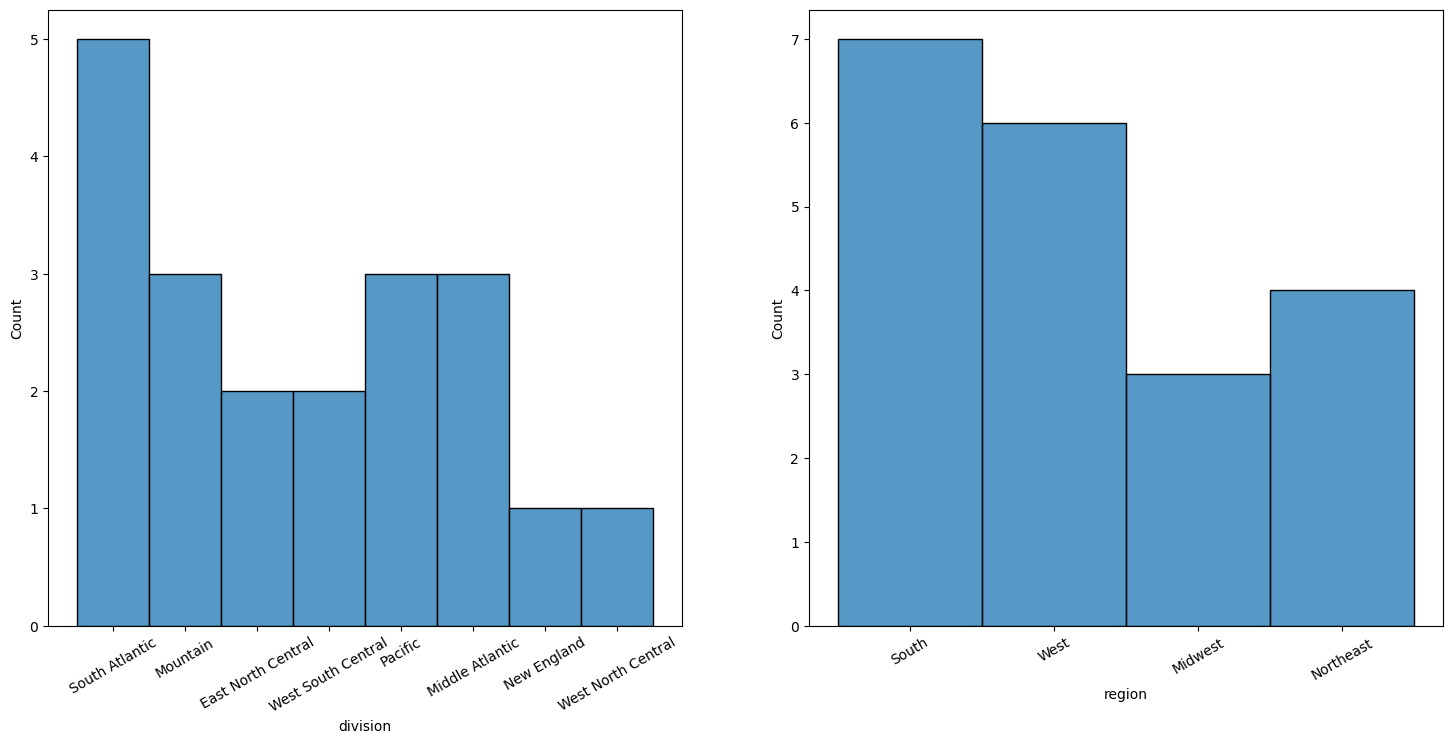

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

sns.histplot(top_20_final['division'], ax=ax[0])
ax[0].tick_params(axis='x', rotation=30)

sns.histplot(top_20_final['region'], ax=ax[1])
ax[1].tick_params(axis='x', rotation=30)

In [95]:
# import airport df to get lat and lon for weather data
airports_df = pd.read_csv(DATA_PATH + '/interim/airports.csv')

In [96]:
airports_df.head()

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,AIRPORT_STATE_FIPS,CITY_MARKET_ID,DISPLAY_CITY_MARKET_NAME_FULL,CITY_MARKET_WAC,LATITUDE,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST,TIMEZONE
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,Alaska,AK,2.0,30001,"Afognak Lake, AK",1,58.109444,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,Alaska,AK,2.0,30003,"Granite Mountain, AK",1,65.548056,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,Alaska,AK,2.0,30004,"Lik, AK",1,68.083333,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1,America/Nome
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,Alaska,AK,2.0,30005,"Little Squaw, AK",1,67.570000,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,Alaska,AK,2.0,30006,"Kizhuyak, AK",1,57.745278,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage


In [98]:
airports_geo = top_20_final.merge(airports_df[['DISPLAY_AIRPORT_NAME', 'AIRPORT', 'AIRPORT_ID', 'LATITUDE', 'LONGITUDE']], left_on='dest_airport_id', right_on='AIRPORT_ID')
airports_geo

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays,region,division,DISPLAY_AIRPORT_NAME,AIRPORT,AIRPORT_ID,LATITUDE,LONGITUDE
0,GA,Atlanta,10397,333384,2915.0,55727,South,South Atlantic,Hartsfield-Jackson Atlanta International,ATL,10397,33.636667,-84.427778
1,CO,Denver,11292,293676,4587.0,62805,West,Mountain,Denver International,DEN,11292,39.861667,-104.673056
2,IL,Chicago,13930,290476,3932.0,56837,Midwest,East North Central,Chicago O'Hare International,ORD,13930,41.976944,-87.908056
3,TX,Dallas/Fort Worth,11298,284704,4691.0,60305,South,West South Central,Dallas/Fort Worth International,DFW,11298,32.897222,-97.037778
4,NC,Charlotte,11057,222710,1956.0,41535,South,South Atlantic,Charlotte Douglas International,CLT,11057,35.213611,-80.949167
5,CA,Los Angeles,12892,193649,1680.0,40075,West,Pacific,Los Angeles International,LAX,12892,33.942500,-118.408056
6,NV,Las Vegas,12889,189153,2340.0,48933,West,Mountain,Harry Reid International,LAS,12889,36.080000,-115.152222
7,WA,Seattle,14747,179608,1291.0,28950,West,Pacific,Seattle/Tacoma International,SEA,14747,47.450000,-122.311667
8,AZ,Phoenix,14107,177959,1270.0,35485,West,Mountain,Phoenix Sky Harbor International,PHX,14107,33.434167,-112.011667
9,NY,New York,12953,161811,4553.0,31127,Northeast,Middle Atlantic,LaGuardia,LGA,12953,40.777222,-73.872500


In [99]:
airports_geo[['AIRPORT', 'AIRPORT_ID', 'DISPLAY_AIRPORT_NAME', 'LATITUDE', 'LONGITUDE']].to_csv(DATA_PATH + '/interim/weather_geos.csv', index=False)

## Delays Grouped by Month

### Arrival Delays

[Text(0.5, 1.0, 'All Delayed Arrivals Grouped by Month'),
 Text(0, 0.5, 'Count of arrival delays')]

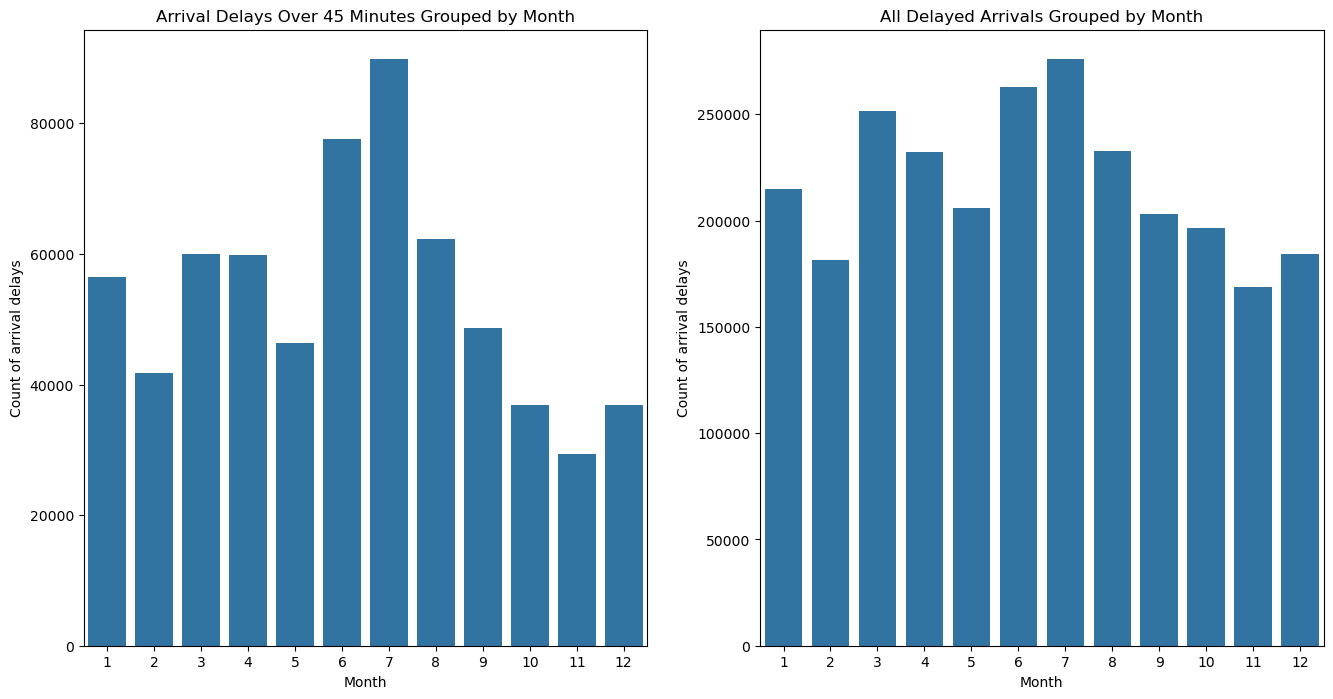

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(df[df['ArrDelay'] > arr_outlier_upper].groupby('Month')['ArrDelay'].count(), ax=ax[0])
ax[0].set(title=f'Arrival Delays Over {round(arr_outlier_upper)} Minutes Grouped by Month', ylabel='Count of arrival delays')

sns.barplot(df[df['ArrDelay'] > 0].groupby('Month')['ArrDelay'].count(), ax=ax[1])
ax[1].set(title='All Delayed Arrivals Grouped by Month', ylabel='Count of arrival delays')

In [33]:
flights_per_month = df_completed.groupby('Month')['Tail_Number'].count().reset_index()
flights_per_month.columns = ['Month', 'Total_Flights']

arr_delay_outliers = df[df['ArrDelay'] > arr_outlier_upper].groupby('Month')['ArrDelay'].count().reset_index()
arr_delay_outliers.columns = ['Month', 'Arr_Delay_Count']

arr_merged = pd.merge(arr_delay_outliers, flights_per_month, on='Month')
arr_merged['perc_del_per_month'] = round(arr_merged['Arr_Delay_Count'] / arr_merged['Total_Flights'] * 100, 2)
arr_merged.sort_values('perc_del_per_month', ascending=False)

,Month,Arr_Delay_Count,Total_Flights,perc_del_per_month
6,7,89844,620780,14.47
5,6,77669,598357,12.98
3,4,59783,584624,10.23
0,1,56513,561365,10.07
2,3,60012,606915,9.89
7,8,62233,628954,9.89
8,9,48675,595744,8.17
1,2,41717,525485,7.94
4,5,46433,611464,7.59
11,12,36878,602501,6.12


After comparing the arrival delay outliers to all arrival delays, there are some simiarities across months. July and June have the highest number of arrival delays when looking at all arrival delays and arrival delays over 45 minutes. Additionally, these months have the highest proportion of flights delayed over 45 minutes. 

Interestingly, October is the most popular month for flights, with over 632,400 flights completed that month, and it has the second lowest proportion of delays over 45 minutes. Approximately, 6% of flights in October were outlier delays compared to just over 14% of flights in July. This would suggest that the total number of flights does not result in a higher number of arrival delays. 

November had fewest number of flights delayed over 45 minutes and fewest number of all arrival delays. I find this particularly interesting because November is Thanksgiving and that holiday weekend has a reputation for flight delays. 

### Departure Delays

[Text(0.5, 1.0, 'All Delayed Departures Grouped by Month'),
 Text(0, 0.5, 'Count of departure delays')]

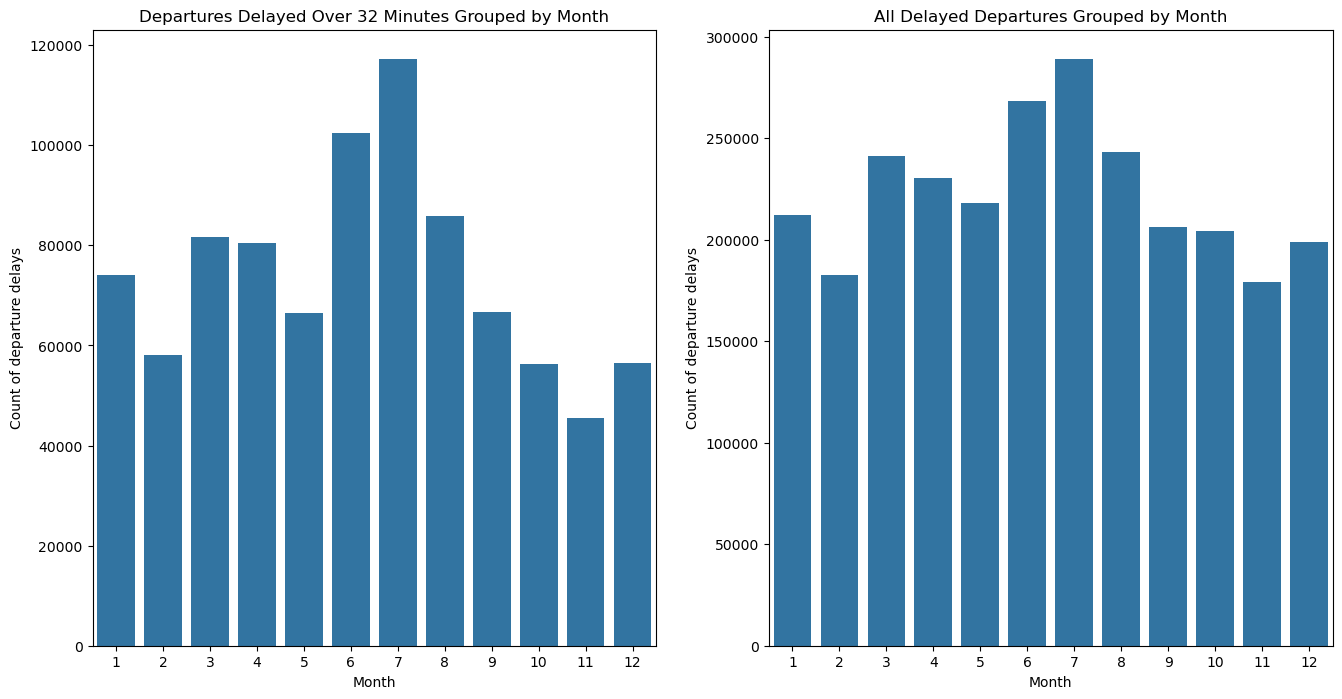

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(df[df['DepDelay'] > dep_outlier_upper].groupby('Month')['DepDelay'].count(), ax=ax[0])
ax[0].set(title=f'Departures Delayed Over {round(dep_outlier_upper)} Minutes Grouped by Month', ylabel='Count of departure delays')

sns.barplot(df_completed[df_completed['DepDelay'] > 0].groupby('Month')['DepDelay'].count(), ax=ax[1])
ax[1].set(title='All Delayed Departures Grouped by Month', ylabel='Count of departure delays')

In [35]:
dep_delay_outliers = df[df['DepDelay'] > dep_outlier_upper].groupby('Month')['DepDelay'].count().reset_index()
dep_delay_outliers.columns = ['Month', 'Dep_Delay_Count']

dep_merged = pd.merge(dep_delay_outliers, flights_per_month, on='Month')
dep_merged['perc_del_per_month'] = round(dep_merged['Dep_Delay_Count'] / dep_merged['Total_Flights'] * 100, 2)
dep_merged.sort_values('Total_Flights', ascending=False)

,Month,Dep_Delay_Count,Total_Flights,perc_del_per_month
9,10,56307,632474,8.90
7,8,85929,628954,13.66
6,7,117219,620780,18.88
4,5,66456,611464,10.87
2,3,81588,606915,13.44
11,12,56492,602501,9.38
10,11,45556,598381,7.61
5,6,102354,598357,17.11
8,9,66771,595744,11.21
3,4,80381,584624,13.75


After comparing the departure delay outliers to all departure delays, there are some simiarities across months. Similar to arrivals, July and June have the highest number of departure delays when looking at all departure delays and arrival delays over 32 minutes. Additionally, these months have the highest proportion of flights with departures delayed over 32 minutes. 

Approximately, 9% of flights in October were outlier departure delays compared to nearly 19% of flights in July. This again would suggest that the total number of flights does not result in a higher number of departure delays. 

Again we see November had fewest number of flights with departure delays over 32 minutes and fewest number of all departure delays.

## Delays Grouped by State

In [36]:
# calculate total completed flights originating and destined for each state
total_flights_state_dest = df_completed.groupby('DestState')['Tail_Number'].count().reset_index()
total_flights_state_dest.columns = ['State', 'Total_Flights_Destination']
total_flights_state_origin = df_completed.groupby('OriginState')['Tail_Number'].count().reset_index()
total_flights_state_origin.columns = ['State', 'Total_Flights_Origin']

total_flights_state = total_flights_state_origin.merge(total_flights_state_dest, on='State')
total_flights_state.head()

,State,Total_Flights_Origin,Total_Flights_Destination
0,AK,41995,42008
1,AL,36054,36075
2,AR,28429,28460
3,AZ,204417,204528
4,CA,739878,740497


Text(0, 0.5, 'Count of delays')

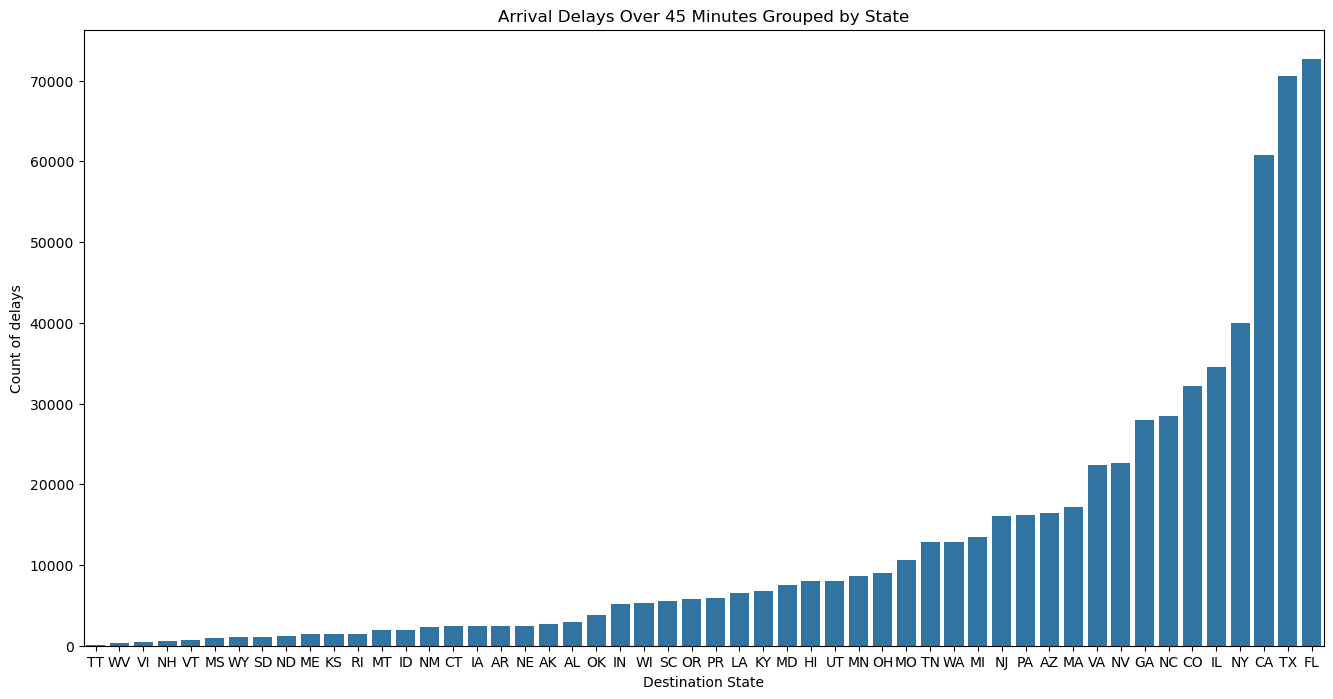

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(df[df['ArrDelay'] > arr_outlier_upper].groupby('DestState')['ArrDelay'].count().sort_values())
ax.set_title(f'Arrival Delays Over {round(arr_outlier_upper)} Minutes Grouped by State')
ax.set_xlabel('Destination State')
ax.set_ylabel('Count of delays')

Florida, Texas and California have the highest volume of arrival flight delays over 45 minutes. 

In [38]:
arrival_delay_state = df[df['ArrDelay'] > arr_outlier_upper].groupby('DestState')['ArrDelay'].count().reset_index()
arrival_delay_state.columns = ['State', 'Arrival_Delay_Count']
arrival_delay_state = pd.merge(arrival_delay_state, total_flights_state, on='State')
arrival_delay_state['perc_of_state_flights'] = round(arrival_delay_state['Arrival_Delay_Count'] / arrival_delay_state['Total_Flights_Destination'] * 100, 2)
arrival_delay_state.sort_values('perc_of_state_flights', ascending=False).head()

,State,Arrival_Delay_Count,Total_Flights_Origin,Total_Flights_Destination,perc_of_state_flights
37,PR,5863,35966,36117,16.23
7,FL,72666,604887,604342,12.02
17,MA,17235,143428,143499,12.01
31,NV,22660,209619,209667,10.81
6,CT,2440,22578,22609,10.79


In [39]:
arrival_delay_state['perc_of_state_flights'].mean()

8.596346153846154

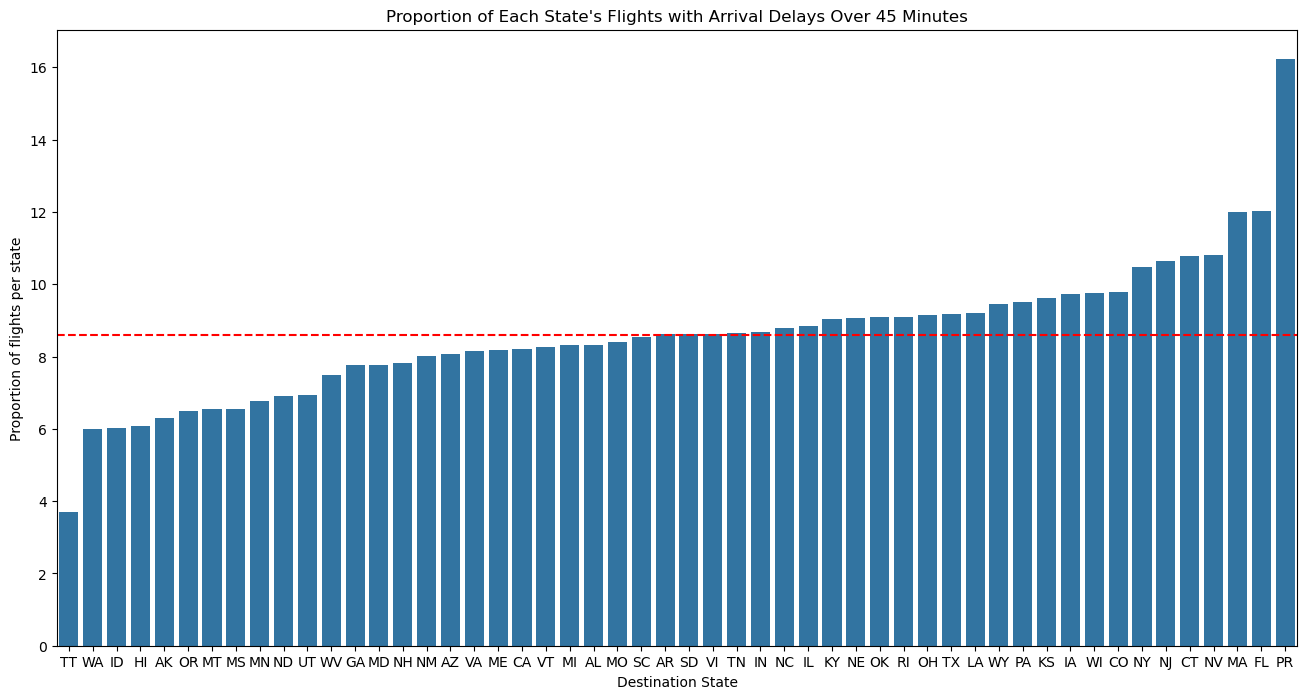

In [40]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(data=arrival_delay_state.sort_values('perc_of_state_flights', ascending=True), x='State', y='perc_of_state_flights')
ax.set_title(f"Proportion of Each State's Flights with Arrival Delays Over {round(arr_outlier_upper)} Minutes")
ax.set_xlabel('Destination State')
ax.set_ylabel('Proportion of flights per state')
ax.axhline(arrival_delay_state['perc_of_state_flights'].mean(), color='r', linestyle='--')

In [41]:
df_completed[(df_completed['DestState'] == "PR") & (df_completed['ArrDelay'] > 0)][delay_types].sum()

CarrierDelay         357608.0
WeatherDelay          32407.0
NASDelay             143637.0
SecurityDelay          3231.0
LateAircraftDelay    306419.0
dtype: float64

In 2023, Puerto Rico had the highest proportion of flights (16%) that were destined for its location encountering arrival delays over 45 minutes. In 2023, most of the arrival delays in Puerto Rico were due to Carrier Delays, Late Aircraft Delays, and NAS Delays. NAS Delays include non-extreme wether conditions. The region is prone to volatile weather such as hurricanes and tropical storms. 

In [42]:
df_completed.groupby('DestState')[delay_types].sum()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DestState,,,,,
AK,126141.0,27893.0,65081.0,6297.0,169666.0
AL,176126.0,42361.0,60625.0,412.0,167426.0
AR,124572.0,30815.0,51881.0,472.0,149472.0
AZ,1110739.0,115907.0,356255.0,6979.0,1229746.0
CA,3471928.0,356556.0,1537931.0,18924.0,3908727.0
CO,1657256.0,322076.0,1106069.0,5337.0,1894469.0
CT,151837.0,14740.0,49403.0,764.0,147859.0
FL,3554620.0,396062.0,2616952.0,26306.0,4342403.0
GA,1908799.0,270803.0,741265.0,8026.0,1651787.0


## Categorize Flights by Departure/Arrival Status and Cancellations

I want to get a better understanding of the data's distribution with respect to flight status. Some of the questions I want to inspect include:

**Departure and Arrival Status**
* How do delayed, on-time, and early flights vary across carriers?
* How do delayed, on-time, and early flights vary across days of the week?
* How do delayed, on-time, and early flights vary across months?
* How do delayed, on-time, and early flights vary across seasons?
* How do delayed, on-time, and early flights vary across routes?

**Cancellations**
* How do cancelled flights vary across carriers?
* How do cancelled flights vary across days of the week?
* How do cancelled flights vary across months?
* How do cancelled flights vary across seasons?
* How do cancelled flights vary across routes?

In [53]:
airline_stats = df[df['Cancelled'] == 0].groupby(['Airline_Ops'])['Arrival_Status'].agg(
    [('Total_Flights','count'), 
     ('Delays_Count', lambda x: (x == 'delayed').sum())
     ]).reset_index()

airline_stats['Perc_Delayed'] = round(airline_stats['Delays_Count'] / airline_stats['Total_Flights'] * 100, 2)
airline_stats.sort_values('Total_Flights', ascending=False)


,Airline_Ops,Total_Flights,Delays_Count,Perc_Delayed
18,Southwest Airlines Co.,1421238,591500,41.62
5,Delta Air Lines Inc.,972931,291816,29.99
3,American Airlines Inc.,928058,361897,39.00
20,United Air Lines Inc.,720032,256628,35.64
17,SkyWest Airlines Inc.,665048,207733,31.24
16,Republic Airline,286868,70244,24.49
12,JetBlue Airways,267915,121407,45.32
19,Spirit Air Lines,258838,117819,45.52
1,Alaska Airlines Inc.,242643,94689,39.02
7,Envoy Air,224809,78454,34.90


## Day of Week

[Text(0.5, 1.0, 'Distribution of Arrival Delays by Day of Week'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

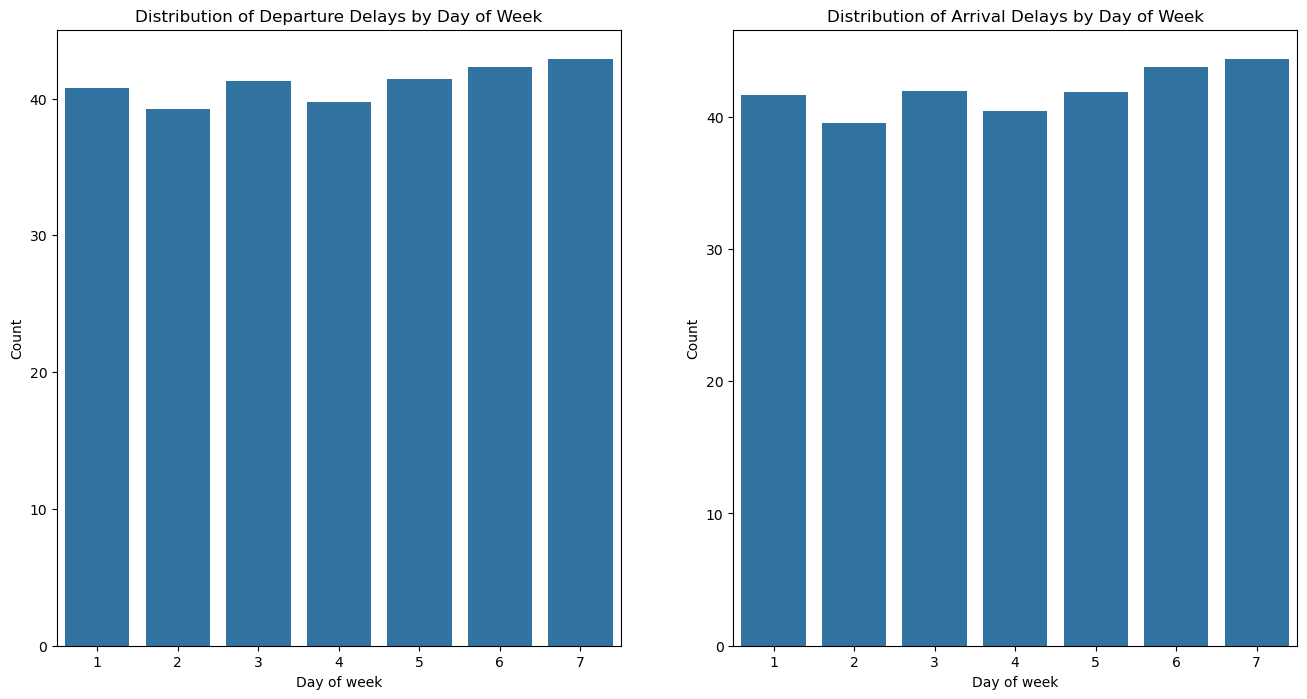

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(data=df[df['Departure_Status'] == 'delayed'], x='DayOfWeek', y='DepDelay', errorbar=None, ax=ax[0])
ax[0].set(title='Distribution of Departure Delays by Day of Week', xlabel='Day of week', ylabel='Count')

sns.barplot(data=df[df['Arrival_Status'] == 'delayed'], x='DayOfWeek', y='ArrDelay', errorbar=None, ax=ax[1])
ax[1].set(title='Distribution of Arrival Delays by Day of Week', xlabel='Day of week', ylabel='Count')


## Cancellations

In [57]:
flights_mkt_cancellations = df.groupby('Airline_Mkt')['Cancelled'].agg(['sum', 'count']).reset_index()
flights_mkt_cancellations['perc_cancelled'] = round(flights_mkt_cancellations['sum'] / flights_mkt_cancellations['count'] * 100, 2)
flights_mkt_cancellations.sort_values('perc_cancelled', ascending=False)

,Airline_Mkt,sum,count,perc_cancelled
4,Frontier Airlines Inc.,3774,177233,2.13
6,JetBlue Airways,5763,273678,2.11
9,United Air Lines Inc.,22111,1294303,1.71
8,Spirit Air Lines,4486,263324,1.70
5,Hawaiian Airlines Inc.,1053,80895,1.30
3,Delta Air Lines Inc.,18181,1481380,1.23
2,American Airlines Inc.,20573,1754435,1.17
7,Southwest Airlines Co.,14325,1435563,1.00
0,Alaska Airlines Inc.,2849,384923,0.74
1,Allegiant Air,782,115207,0.68


[Text(0.5, 1.0, 'Distribution of Cancellations by Day of Week'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

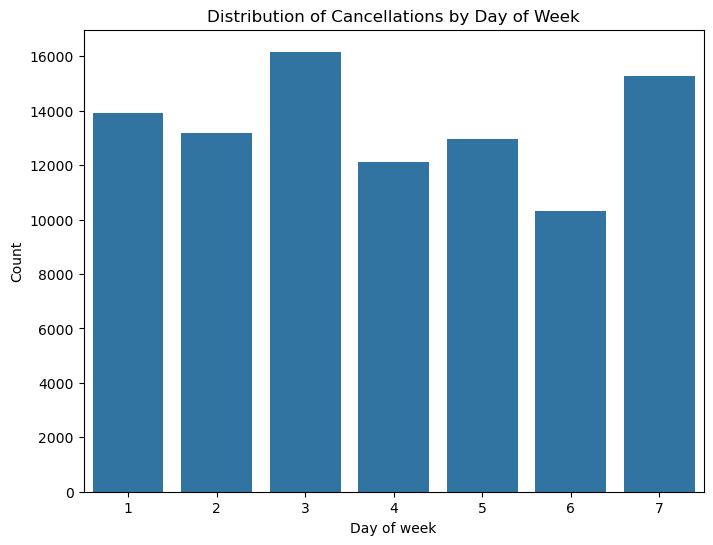

In [58]:
cancellations_dow = df.groupby('DayOfWeek')['Cancelled'].sum().reset_index()
cancellations_dow.columns = ['Day_of_Week', 'Count_Cancelled_Flights']

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=cancellations_dow, x='Day_of_Week', y='Count_Cancelled_Flights', errorbar=None)
ax.set(title='Distribution of Cancellations by Day of Week', xlabel='Day of week', ylabel='Count')

[Text(0.5, 1.0, 'Distribution of Cancellations by Day of Month'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

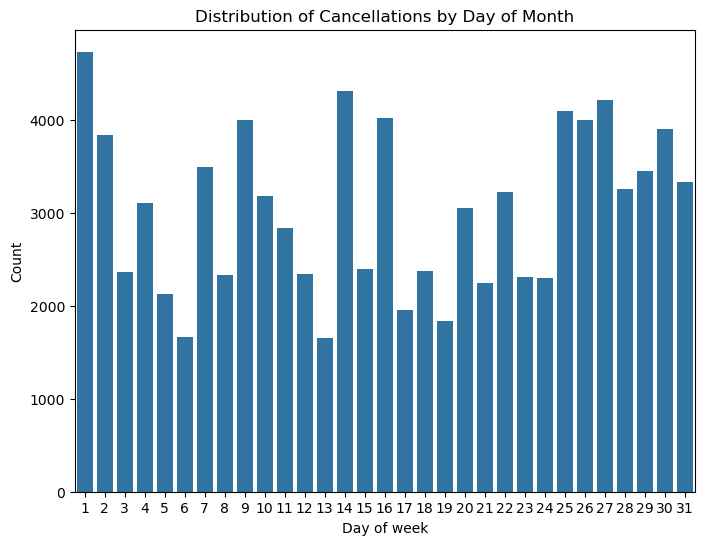

In [59]:
cancellations_dow = df.groupby('DayofMonth')['Cancelled'].sum().reset_index()
cancellations_dow.columns = ['Day_of_Month', 'Count_Cancelled_Flights']

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=cancellations_dow, x='Day_of_Month', y='Count_Cancelled_Flights', errorbar=None)
ax.set(title='Distribution of Cancellations by Day of Month', xlabel='Day of week', ylabel='Count')

## Distance

In [60]:
df[['Distance']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,Distance
count,7260941.00
mean,806.52
std,593.75
min,21.00
25%,372.00
50%,647.00
75%,1044.00
max,5095.00


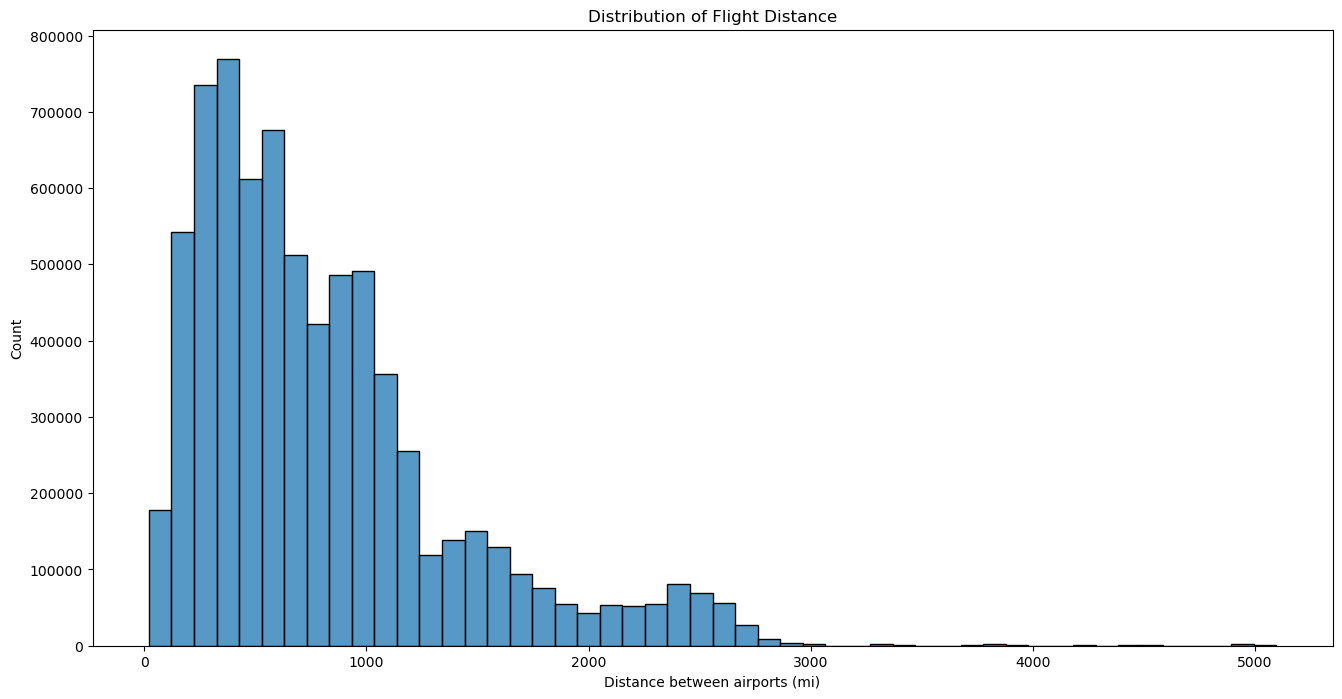

In [61]:
fig, ax = plt.subplots(figsize=(16,8))

sns.histplot(df['Distance'], bins=50)
ax.set(title='Distribution of Flight Distance', xlabel='Distance between airports (mi)')
ax.ticklabel_format(style='plain', axis='both')


In [62]:
df[['TaxiOut', 'TaxiIn']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,TaxiOut,TaxiIn
count,7167822.00,7167044.00
mean,17.54,8.10
std,9.34,6.47
min,1.00,1.00
25%,12.00,4.00
50%,15.00,6.00
75%,20.00,10.00
max,269.00,236.00


In [63]:
routes = df[['Origin', 'Dest']].value_counts().reset_index()
routes.head(50)

,Origin,Dest,count
0,HNL,OGG,12610
1,OGG,HNL,12605
2,LAX,SFO,11726
3,SFO,LAX,11700
4,LAX,LAS,10575
5,LAS,LAX,10562
6,JFK,LAX,10024
7,LAX,JFK,10010
8,LGA,ORD,9902
9,ORD,LGA,9881


In [64]:
df['Origin'].nunique()

359

In [65]:
df['Dest'].nunique()

359